In [1454]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [1455]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 80

In [1456]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [1457]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1458]:
print('Training data shape :' , train.shape)
print('Test data shape :' , test.shape)

Training data shape : (891, 12)
Test data shape : (418, 11)


In [1459]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1460]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Combining Training & Test Set

In [1461]:
df = pd.concat([train, test], ignore_index=True, )

In [1462]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [1463]:
# To get Test Set
# df.iloc[891:,:]

# Checking Duplicates/Missing Values & their treatment

In [1464]:
df.duplicated().sum()

0

In [1465]:
# Missing Values 

df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [1466]:
round(df.isna().sum()/len(df)*100, 2)

PassengerId     0.00
Survived       31.93
Pclass          0.00
Name            0.00
Sex             0.00
Age            20.09
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.08
Cabin          77.46
Embarked        0.15
dtype: float64

## Missing Value Treatment

### Column 'Embarked'

In [1467]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [1468]:
df1 = df[df['Cabin'].notnull()].copy()
df1 = df1[df1['Cabin'].apply(lambda x: x[0]=='B')]
df1['Cabin'] = df1['Cabin'].apply(lambda x: x[0])

df1.groupby(['Embarked'])['Cabin'].value_counts()

Embarked  Cabin
C         B        32
S         B        31
Name: Cabin, dtype: int64

In [1469]:
df['Embarked'].fillna('C', inplace=True)

### Column 'Cabin'

In [1470]:
# Dropping Column "Cabin" as 77% data is missing

df.drop(columns=['Cabin'], inplace=True)

### Column 'Age'

In [1471]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [1472]:
df['Name_Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0])

In [1473]:
df['Name_Title'].value_counts()

 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Ms                2
 Major             2
 Mlle              2
 Jonkheer          1
 Capt              1
 Sir               1
 the Countess      1
 Mme               1
 Dona              1
 Don               1
 Lady              1
Name: Name_Title, dtype: int64

In [1474]:
df['Name_Title'] = df['Name_Title'].apply(lambda x: ' Miss' if x in [' Ms',' Mlle',' Mme'] else ' Mrs' if x in [' Lady',
                                                    ' the Countess'] else ' Mr' if x==' Sir' else x if x in [' Mr', ' Miss', 
                                                    ' Mrs', ' Master'] else ' Others')

df['Name_Title'] = df['Name_Title'].apply(lambda x: x.split(' ')[1])

In [1475]:
df['Name_Title'].value_counts()

Mr        758
Miss      265
Mrs       199
Master     61
Others     26
Name: Name_Title, dtype: int64

In [1476]:
def age(a):
    Age = a[0]
    Name_Title = a[1]
    if pd.isna(Age):
        if Name_Title == 'Mr':
            return df[df['Name_Title']=='Mr']['Age'].mean()
        
        elif Name_Title == 'Miss':
            return df[df['Name_Title']=='Miss']['Age'].mean()
        
        elif Name_Title == 'Mrs':
            return df[df['Name_Title']=='Mrs']['Age'].mean()
        
        elif Name_Title == 'Master':
            return df[df['Name_Title']=='Master']['Age'].mean()
        
        elif Name_Title == 'Others':
            return df[df['Name_Title']=='Others']['Age'].mean()
        
    else:
        return Age

In [1477]:
df['Age'] = round(df[['Age','Name_Title']].apply(age, axis=1),1)

In [1478]:
df.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         0
Name_Title       0
dtype: int64

### Column 'Fare'

In [1479]:
df[df['Fare'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_Title
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S,Mr


In [1480]:
df1 = df[df['Age'].apply(lambda x: x>55 and x<65)]

df1[df1['Name_Title']=='Mr'].groupby(['Embarked'])['Fare'].median().to_frame()

,Fare
Embarked,
C,79.20000
Q,11.01875
S,26.27500


In [1481]:
df['Fare'].fillna(30, inplace=True)

# Feature Engineering

In [1482]:
df['Name'][759]

'Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)'

In [1483]:
# The Idea behind is that if a person has some nickname in the brackets then, he/she might be important person.

df['Imp_Ppl'] = df['Name'].apply(lambda x: 0 if len(x.split('(')) == 1 else 1)

In [1484]:
df.groupby(['Imp_Ppl'])['Survived'].value_counts().to_frame()

Survived
Imp_Ppl Survived          
0       0.0            516
        1.0            232
1       1.0            110
        0.0             33

In [1485]:
df['Relatives'] = df['SibSp'] + df['Parch']
df['Relatives'].value_counts()

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: Relatives, dtype: int64

In [1486]:
df['Relatives'] = df['Relatives'].apply(lambda x: '5' if x>=4 else x)

In [1487]:
plt.rcParams['figure.figsize'] = (9,6)

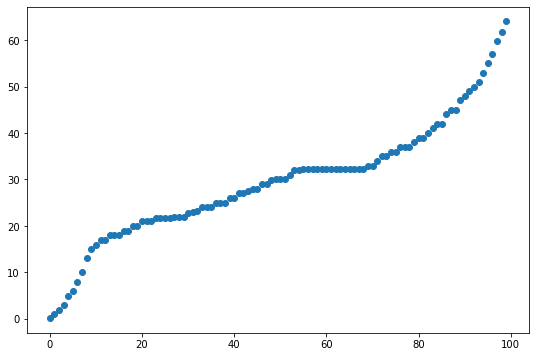

In [1488]:
plt.plot(np.percentile(df['Age'], range(0,100)), marker='o', linestyle=' ')

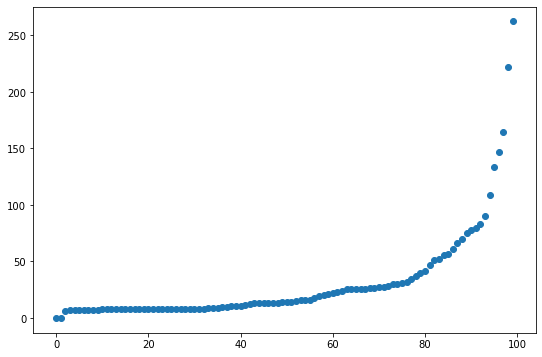

In [1489]:
plt.plot(np.percentile(df['Fare'], range(0,100)), marker='o', linestyle=' ')

In [1490]:
np.percentile(df['Fare'], range(0,100))

array([  0.      ,   0.      ,   6.4958  ,   7.05    ,   7.130344,
         7.225   ,   7.2292  ,   7.2292  ,   7.25    ,   7.304324,
         7.57    ,   7.728696,   7.75    ,   7.75    ,   7.75    ,
         7.75    ,   7.757   ,   7.775   ,   7.776848,   7.810816,
         7.8542  ,   7.868344,   7.893808,   7.8958  ,   7.8958  ,
         7.8958  ,   7.925   ,   7.925   ,   8.05    ,   8.05    ,
         8.05    ,   8.05    ,   8.05    ,   8.6047  ,   8.6625  ,
         8.94    ,   9.497996,   9.5875  ,  10.5     ,  10.5     ,
        10.5     ,  11.5     ,  12.35    ,  13.      ,  13.      ,
        13.      ,  13.      ,  13.      ,  13.5     ,  13.992   ,
        14.4542  ,  14.5     ,  15.2458  ,  15.5     ,  15.782   ,
        16.1     ,  17.592   ,  19.2583  ,  20.525   ,  21.      ,
        21.6792  ,  23.      ,  24.      ,  25.4667  ,  26.      ,
        26.      ,  26.      ,  26.      ,  26.2875  ,  26.55    ,
        27.      ,  27.740656,  28.5285  ,  29.7     ,  30.465

In [1491]:
df['Fare'] = df['Fare'].apply(lambda x: 130 if x>130 else x)

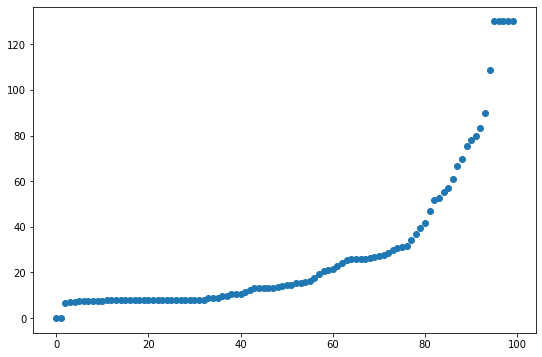

In [1492]:
plt.plot(np.percentile(df['Fare'], range(0,100)), marker='o', linestyle=' ')

- Surviving odds increases as Fare increases | Pattern Found - below_10, 10-30, 30-80, above_80 

In [1493]:
df[df['Fare'].apply(lambda x: x<80 and x>30)]['Survived'].value_counts()

0.0    81
1.0    77
Name: Survived, dtype: int64

- Surviving odds as per Age column | Pattern Found - below_7, 7-12, 12-20, 20-38, 38-48, above_49 

In [1494]:
df[df['Age'].apply(lambda x: x>=38 and x<48)].groupby(['Sex'])['Survived'].value_counts(normalize=True).to_frame()

Survived
Sex    Survived          
female 1.0       0.675676
       0.0       0.324324
male   0.0       0.857143
       1.0       0.142857

In [1495]:
df1 = df[df['Survived'].notnull()].copy()

display(df1[df1['Age'].apply(lambda x: x>=38 and x<49)].groupby(['Sex'])['Imp_Ppl'].value_counts().to_frame())
display(df1[df1['Age'].apply(lambda x: x>=38 and x<49)].groupby(['Sex'])['Survived'].value_counts().to_frame())

Imp_Ppl
Sex    Imp_Ppl         
female 1             31
       0             10
male   0             66
       1              2

Survived
Sex    Survived          
female 1.0             28
       0.0             13
male   0.0             56
       1.0             12

- Dropping Unnecessary Columns

In [1496]:
df.drop(columns=['Name','SibSp','Parch','Ticket'], inplace=True)

# Visualising Variables

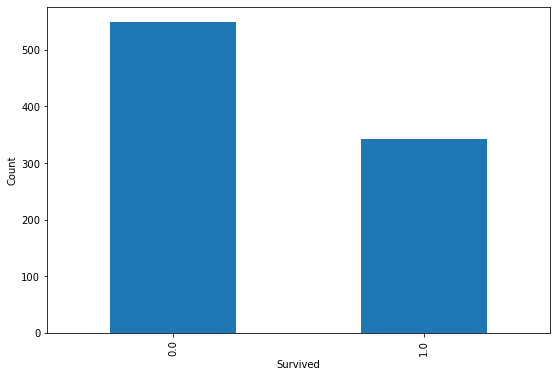

In [1497]:
df['Survived'].value_counts().plot(kind='bar')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

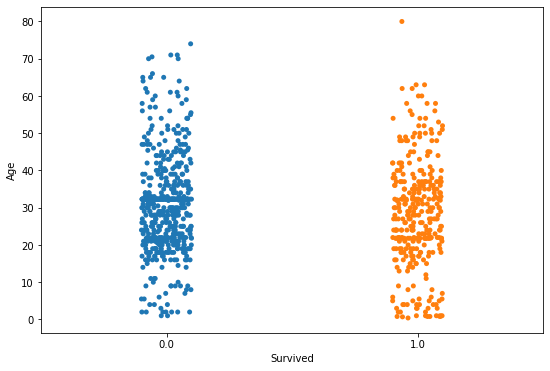

In [1498]:
sns.stripplot(data=df, x='Survived', y='Age')
plt.show()

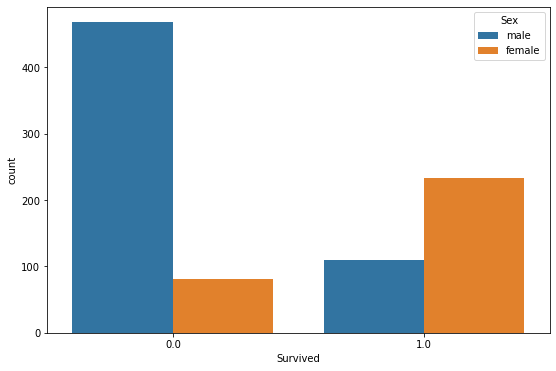

In [1499]:
sns.countplot(x='Survived',hue='Sex', data=df)
plt.show()

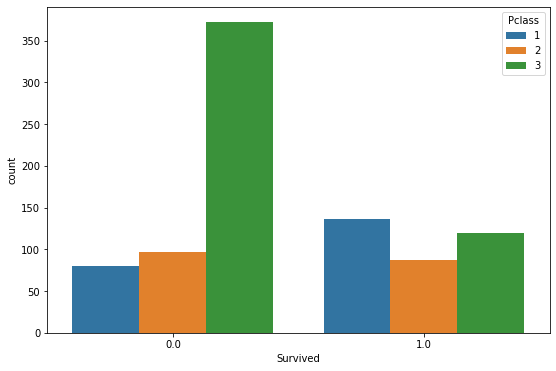

In [1500]:
sns.countplot(x='Survived',hue='Pclass', data=df)
plt.show()

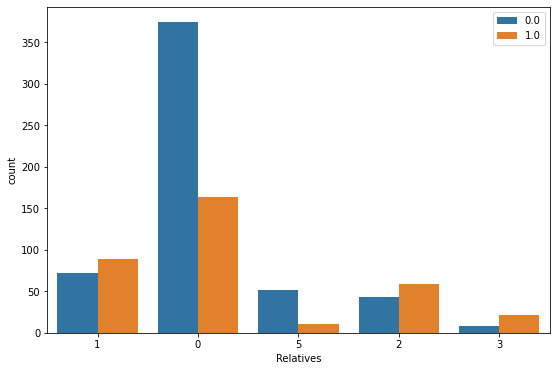

In [1501]:
# ['0','1','2','3','4','>=5']

sns.countplot(x='Relatives',hue='Survived', data=df)
plt.legend(loc='upper right')
plt.show()

<AxesSubplot:xlabel='Embarked'>

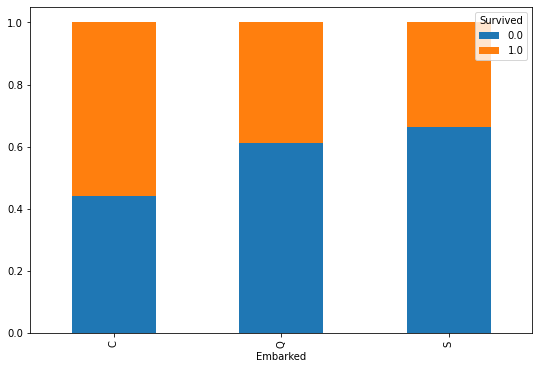

In [1502]:
pd.crosstab(df['Embarked'],df['Survived'],normalize='index').plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Name_Title'>

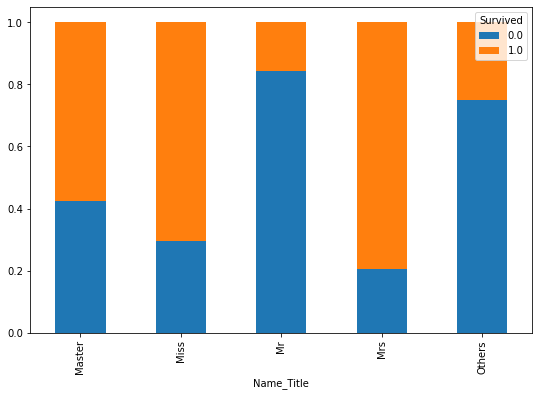

In [1503]:
df.groupby(['Name_Title'])['Survived'].value_counts(normalize=True).unstack('Survived').plot.bar(stacked=True)

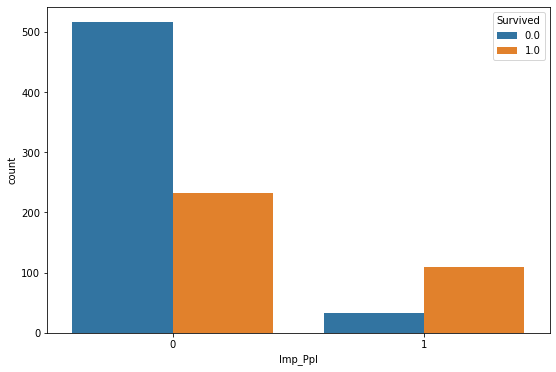

In [1504]:
sns.countplot(x='Imp_Ppl',hue='Survived', data=df)
plt.show()

<AxesSubplot:xlabel='Imp_Ppl'>

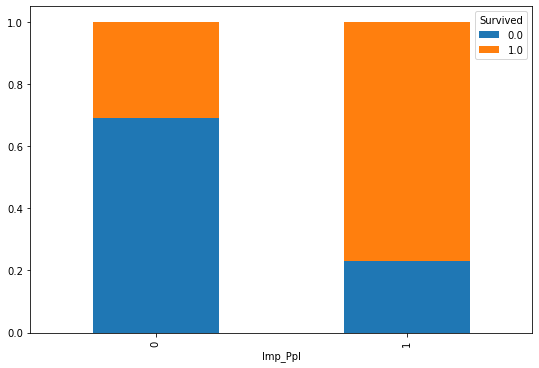

In [1505]:
df.groupby(['Imp_Ppl'])['Survived'].value_counts(normalize=True).unstack('Survived').plot.bar(stacked=True)

<AxesSubplot:xlabel='Relatives'>

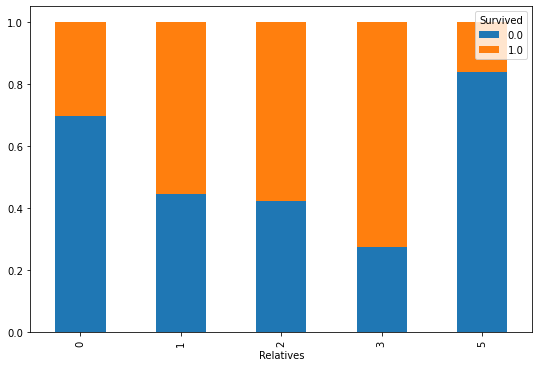

In [1506]:
pd.crosstab(df['Relatives'],df['Survived'],normalize='index').plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

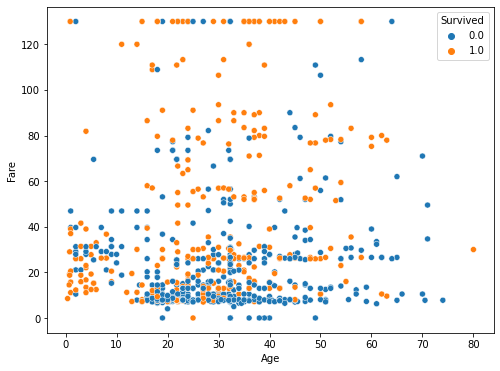

In [1507]:
plt.figure(figsize=(8,6))

sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', palette='tab10')

# Normalize Scaling & Creating Dummies

- Scaling

In [1508]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [1509]:
ss = StandardScaler()

In [1510]:
ss.fit(np.array(df['Age']).reshape(-1, 1))

df['Age_scaled'] = ss.transform(np.array(df['Age']).reshape(-1, 1))

In [1511]:
ss.fit(np.array(df['Fare']).reshape(-1, 1))

df['Fare_scaled'] = ss.transform(np.array(df['Fare']).reshape(-1, 1))

In [1512]:
df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Name_Title,Imp_Ppl,Relatives,Age_scaled,Fare_scaled
0,1,0.0,3,male,22.0,7.2500,S,Mr,0,1,-0.598919,-0.669624
1,2,1.0,1,female,38.0,71.2833,C,Mrs,1,1,0.613894,1.303814
2,3,1.0,3,female,26.0,7.9250,S,Miss,0,0,-0.295716,-0.648821


- Dummies

In [1513]:
dummy_df = pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','Name_Title', 'Relatives'], drop_first=True)

In [1514]:
dummy_df.head()

,PassengerId,Survived,Age,Fare,Imp_Ppl,Age_scaled,Fare_scaled,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Name_Title_Miss,Name_Title_Mr,Name_Title_Mrs,Name_Title_Others,Relatives_1,Relatives_2,Relatives_3,Relatives_5
0,1,0.0,22.0,7.2500,0,-0.598919,-0.669624,0,1,1,0,1,0,1,0,0,1,0,0,0
1,2,1.0,38.0,71.2833,1,0.613894,1.303814,0,0,0,0,0,0,0,1,0,1,0,0,0
2,3,1.0,26.0,7.9250,0,-0.295716,-0.648821,0,1,0,0,1,1,0,0,0,0,0,0,0
3,4,1.0,35.0,53.1000,1,0.386491,0.743424,0,0,0,0,1,0,0,1,0,1,0,0,0
4,5,0.0,35.0,8.0500,0,0.386491,-0.644969,0,1,1,0,1,0,1,0,0,0,0,0,0


In [1515]:
dummy_df.shape

(1309, 20)

<AxesSubplot:>

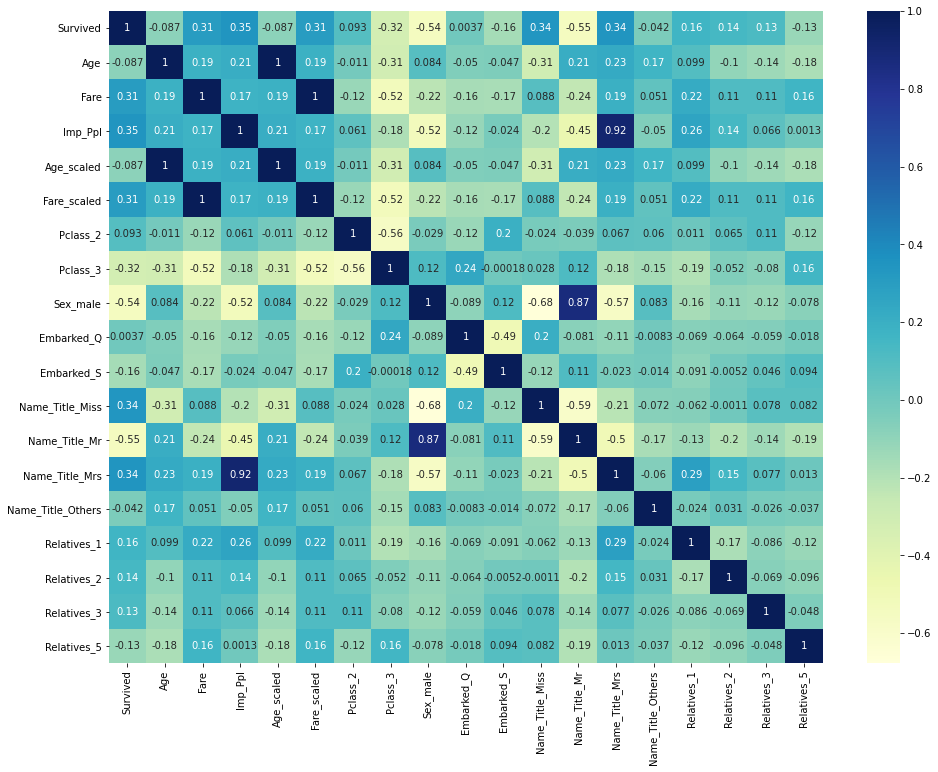

In [1516]:
plt.figure(figsize=(16,12))

corr = dummy_df.drop(columns=['PassengerId']).corr()

sns.heatmap(corr, annot=True, cmap='YlGnBu')

# Train - Test Splitting & Model Fitting

In [1517]:
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [1518]:
train_df = dummy_df.iloc[:891,:]

In [1519]:
x = train_df.drop(columns=['PassengerId','Survived','Age','Sex_male','Fare'])
y = train['Survived']

In [1520]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=112)

In [1521]:
print('X train :', x_train.shape)
print('x test :', x_test.shape)

X train : (668, 15)
x test : (223, 15)


In [1522]:
x.head()

,Imp_Ppl,Age_scaled,Fare_scaled,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Name_Title_Miss,Name_Title_Mr,Name_Title_Mrs,Name_Title_Others,Relatives_1,Relatives_2,Relatives_3,Relatives_5
0,0,-0.598919,-0.669624,0,1,0,1,0,1,0,0,1,0,0,0
1,1,0.613894,1.303814,0,0,0,0,0,0,1,0,1,0,0,0
2,0,-0.295716,-0.648821,0,1,0,1,1,0,0,0,0,0,0,0
3,1,0.386491,0.743424,0,0,0,1,0,0,1,0,1,0,0,0
4,0,0.386491,-0.644969,0,1,0,1,0,1,0,0,0,0,0,0


In [1523]:
# Calculating VIF for each feature

vif_data = pd.DataFrame()
vif_data['Features'] = x.columns

vif_data['VIF'] = [vif(x.values,i) for i in range(len(x.columns))]

vif_data.sort_values(by='VIF', ascending=False, inplace=True, ignore_index=True)

display(vif_data)

,Features,VIF
0,Pclass_3,8.501191
1,Name_Title_Mrs,8.210144
2,Name_Title_Mr,6.713501
3,Imp_Ppl,6.183358
4,Embarked_S,5.040293
5,Pclass_2,3.197777
6,Fare_scaled,2.700623
7,Name_Title_Miss,2.650199
8,Age_scaled,1.721911
9,Relatives_1,1.631292


## LogisticRegression

In [1524]:
logR = LogisticRegression()

logR.fit(x_train,y_train)
y_pred = logR.predict(x_test)
y_prob = logR.predict_proba(x_test)

In [1525]:
print('Accuracy Score : ', accuracy_score(y_test, y_pred), '\n')
print('Confusion Matrix : \n', confusion_matrix(y_test,y_pred),'\n')
print('Classification Report : \n', classification_report(y_test,y_pred))

Accuracy Score :  0.8654708520179372 

Confusion Matrix : 
 [[125  14]
 [ 16  68]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.90      0.89       139
           1       0.83      0.81      0.82        84

    accuracy                           0.87       223
   macro avg       0.86      0.85      0.86       223
weighted avg       0.86      0.87      0.87       223



In [1526]:
k=[]

for i in y_prob[:,0]:
    if i < 0.51:
        k.append(1)
    else:
        k.append(0)

print('Accuracy Score : ', accuracy_score(y_test, k), '\n')
print('Confusion Matrix : \n', confusion_matrix(y_test,k),'\n')
print('Classification Report : \n', classification_report(y_test,k))

Accuracy Score :  0.874439461883408 

Confusion Matrix : 
 [[125  14]
 [ 14  70]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       139
           1       0.83      0.83      0.83        84

    accuracy                           0.87       223
   macro avg       0.87      0.87      0.87       223
weighted avg       0.87      0.87      0.87       223



### Using Sequentional Feature Selection to get optimum features for prediction

In [1527]:
x = train_df.drop(columns=['PassengerId','Survived','Age','Fare'])
y = train['Survived']

In [1528]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=112)

In [1529]:
print('X train :', x_train.shape)
print('x test :', x_test.shape)

X train : (668, 16)
x test : (223, 16)


In [1530]:
sfs1 = sfs(LogisticRegression(max_iter=400), k_features= (2,16), forward=True, floating=False, cv=10, verbose=2,
           scoring='roc_auc')

sfs1.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s finished

[2022-04-03 01:23:38] Features: 1/16 -- score: 0.7691988742964353[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s finished

[2022-04-03 01:23:38] Features: 2/16 -- score: 0.8266791744840527[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished

[2022-04-03 01:23:39] Features: 3/16 -- score: 0.8373996247654786[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

SequentialFeatureSelector(cv=10, estimator=LogisticRegression(max_iter=400),
                          k_features=(2, 16), scoring='roc_auc', verbose=2)

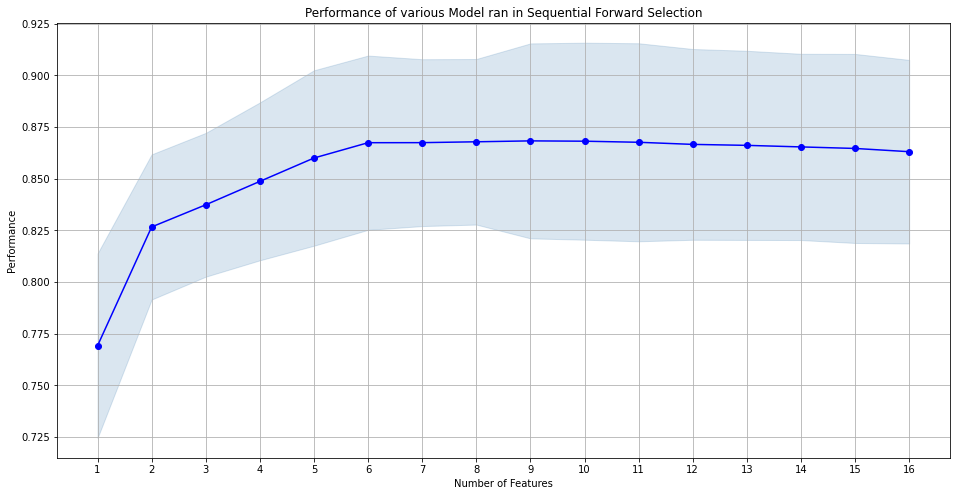

In [1531]:
plt.rcParams['figure.figsize'] = (16,8)

fig1 = plot_sfs(sfs1.get_metric_dict())
plt.title('Performance of various Model ran in Sequential Forward Selection')
plt.grid()
plt.show()

In [1532]:
# Creating Dataframe representing performance of Features in SFS 

sfs1_df = pd.DataFrame(sfs1.get_metric_dict()).T.reset_index()

display(sfs1_df)

,index,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,1,"(9,)","[0.6787054409005628, 0.8081613508442776, 0.830...",0.769199,"(Name_Title_Mr,)",0.0331508,0.0446348,0.0148783
1,2,"(4, 9)","[0.7903377110694185, 0.8344277673545966, 0.904...",0.826679,"(Pclass_3, Name_Title_Mr)",0.0260774,0.035111,0.0117037
2,3,"(3, 4, 9)","[0.8095684803001877, 0.8527204502814258, 0.910...",0.8374,"(Pclass_2, Pclass_3, Name_Title_Mr)",0.0258306,0.0347787,0.0115929
3,4,"(3, 4, 9, 15)","[0.8208255159474673, 0.8785178236397749, 0.916...",0.848724,"(Pclass_2, Pclass_3, Name_Title_Mr, Relatives_5)",0.0283585,0.0381823,0.0127274
4,5,"(3, 4, 9, 11, 15)","[0.8306754221388369, 0.9122889305816135, 0.912...",0.860026,"(Pclass_2, Pclass_3, Name_Title_Mr, Name_Title...",0.031514,0.0424309,0.0141436
5,6,"(1, 3, 4, 9, 11, 15)","[0.8442776735459663, 0.9212007504690432, 0.918...",0.867433,"(Age_scaled, Pclass_2, Pclass_3, Name_Title_Mr...",0.0313031,0.042147,0.014049
6,7,"(1, 3, 4, 7, 9, 11, 15)","[0.8484990619136961, 0.9075984990619138, 0.917...",0.867458,"(Age_scaled, Pclass_2, Pclass_3, Embarked_S, N...",0.0299779,0.0403627,0.0134542
7,8,"(1, 3, 4, 7, 8, 9, 11, 15)","[0.849437148217636, 0.9066604127579737, 0.9212...",0.867876,"(Age_scaled, Pclass_2, Pclass_3, Embarked_S, N...",0.0297411,0.0400439,0.013348
8,9,"(0, 1, 3, 4, 7, 8, 9, 11, 15)","[0.8522514071294559, 0.9263602251407129, 0.950...",0.868313,"(Imp_Ppl, Age_scaled, Pclass_2, Pclass_3, Emba...",0.0350209,0.0471526,0.0157175
9,10,"(0, 1, 3, 4, 7, 8, 9, 11, 12, 15)","[0.8564727954971858, 0.9282363977485929, 0.951...",0.868159,"(Imp_Ppl, Age_scaled, Pclass_2, Pclass_3, Emba...",0.0353941,0.0476552,0.0158851


In [1533]:
# Best score at 

sfs1_df.iloc[sfs1_df['avg_score'].astype('float').idxmax()].to_frame()

,8
index,9
feature_idx,"(0, 1, 3, 4, 7, 8, 9, 11, 15)"
cv_scores,"[0.8522514071294559, 0.9263602251407129, 0.950..."
avg_score,0.868313
feature_names,"(Imp_Ppl, Age_scaled, Pclass_2, Pclass_3, Emba..."
ci_bound,0.0350209
std_dev,0.0471526
std_err,0.0157175


In [1534]:
sfs_features = list(sfs1_df.iloc[sfs1_df['avg_score'].astype('float').idxmax()][4])

In [1535]:
x = train_df[sfs_features]
y = train['Survived']

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=12, stratify=y)

print('X train :', x_train.shape)
print('x test :', x_test.shape)

X train : (668, 9)
x test : (223, 9)


In [1536]:
logR = LogisticRegression()

logR.fit(x_train,y_train)
y_pred = logR.predict(x_test)
y_prob = logR.predict_proba(x_test)

In [1537]:
print('Accuracy Score : ', accuracy_score(y_test, y_pred), '\n')
print('Confusion Matrix : \n', confusion_matrix(y_test,y_pred),'\n')
print('Classification Report : \n', classification_report(y_test,y_pred))

Accuracy Score :  0.8161434977578476 

Confusion Matrix : 
 [[120  17]
 [ 24  62]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       137
           1       0.78      0.72      0.75        86

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.81      0.82      0.81       223



In [1538]:
k=[]

for i in y_prob[:,0]:
    if i < 0.58:
        k.append(1)
    else:
        k.append(0)

print('Accuracy Score : ', accuracy_score(y_test, k), '\n')
print('Confusion Matrix : \n', confusion_matrix(y_test,k),'\n')
print('Classification Report : \n', classification_report(y_test,k))

Accuracy Score :  0.8161434977578476 

Confusion Matrix : 
 [[117  20]
 [ 21  65]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       137
           1       0.76      0.76      0.76        86

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.82      0.82      0.82       223



## Random Forest

In [1539]:
rf_df = df.copy()

In [1540]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Name_Title,Imp_Ppl,Relatives,Age_scaled,Fare_scaled
0,1,0.0,3,male,22.0,7.2500,S,Mr,0,1,-0.598919,-0.669624
1,2,1.0,1,female,38.0,71.2833,C,Mrs,1,1,0.613894,1.303814
2,3,1.0,3,female,26.0,7.9250,S,Miss,0,0,-0.295716,-0.648821
3,4,1.0,1,female,35.0,53.1000,S,Mrs,1,1,0.386491,0.743424
4,5,0.0,3,male,35.0,8.0500,S,Mr,0,0,0.386491,-0.644969


In [1541]:
rf_df['Pclass'] = rf_df['Pclass'].astype('object')
rf_df['Imp_Ppl'] = rf_df['Imp_Ppl'].astype('object')

# Male: 0, Female: 1
rf_df['Sex'] = rf_df['Sex'].apply(lambda x: 0 if x =='male' else 1)
rf_df['Sex'] = rf_df['Sex'].astype('object')

# Embarked s: 0, c: 1, Q: 2
rf_df['Embarked'] = rf_df['Embarked'].apply(lambda x: 0 if x=='S' else 1 if x=='C' else 2)
rf_df['Embarked'] = rf_df['Embarked'].astype('object')

In [1542]:
le = LabelEncoder()

le.fit(rf_df['Name_Title'])
rf_df['Name_Title'] = le.transform(rf_df['Name_Title'])

rf_df['Name_Title'] = rf_df['Name_Title'].astype('object')

In [1543]:
train_df = rf_df.iloc[:891,:]

x = train_df.drop(columns=['PassengerId','Survived','Age','Fare'])
y = train['Survived']

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=112)

In [1544]:
print('X train :', x_train.shape)
print('x test :', x_test.shape)

X train : (668, 8)
x test : (223, 8)


- Base Model

In [1545]:
rf = RandomForestClassifier(random_state=12)

rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
y_prob = rf.predict_proba(x_test)

In [1546]:
print('Accuracy Score : ', accuracy_score(y_test, y_pred), '\n')
print('Confusion Matrix : \n', confusion_matrix(y_test,y_pred),'\n')
print('Classification Report : \n', classification_report(y_test,y_pred))

Accuracy Score :  0.8385650224215246 

Confusion Matrix : 
 [[122  17]
 [ 19  65]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       139
           1       0.79      0.77      0.78        84

    accuracy                           0.84       223
   macro avg       0.83      0.83      0.83       223
weighted avg       0.84      0.84      0.84       223



In [1547]:
k=[]

for i in y_prob[:,0]:
    if i < 0.51:
        k.append(1)
    else:
        k.append(0)

print('Accuracy Score : ', accuracy_score(y_test, k), '\n')
print('Confusion Matrix : \n', confusion_matrix(y_test,k),'\n')
print('Classification Report : \n', classification_report(y_test,k))

Accuracy Score :  0.8475336322869955 

Confusion Matrix : 
 [[122  17]
 [ 17  67]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       139
           1       0.80      0.80      0.80        84

    accuracy                           0.85       223
   macro avg       0.84      0.84      0.84       223
weighted avg       0.85      0.85      0.85       223



- GridSearchCV

In [1548]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 80, stop = 480, num = 6)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 10, num = 8)]

# Maximum Features
max_features = [2,3,4,5,6]

params = {'n_estimators': n_estimators,
          'max_depth': max_depth,
          'max_features': max_features}

print(params)

{'n_estimators': [80, 160, 240, 320, 400, 480], 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10], 'max_features': [2, 3, 4, 5, 6]}


In [1549]:
rf_grid = GridSearchCV(RandomForestClassifier(oob_score=True), param_grid=params, cv=5, verbose=2, scoring='accuracy')

rf_grid.fit(x_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] max_depth=3, max_features=2, n_estimators=80 ....................
[CV] ..... max_depth=3, max_features=2, n_estimators=80, total=   0.1s
[CV] max_depth=3, max_features=2, n_estimators=80 ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..... max_depth=3, max_features=2, n_estimators=80, total=   0.1s
[CV] max_depth=3, max_features=2, n_estimators=80 ....................
[CV] ..... max_depth=3, max_features=2, n_estimators=80, total=   0.1s
[CV] max_depth=3, max_features=2, n_estimators=80 ....................
[CV] ..... max_depth=3, max_features=2, n_estimators=80, total=   0.1s
[CV] max_depth=3, max_features=2, n_estimators=80 ....................
[CV] ..... max_depth=3, max_features=2, n_estimators=80, total=   0.1s
[CV] max_depth=3, max_features=2, n_estimators=160 ...................
[CV] .... max_depth=3, max_features=2, n_estimators=160, total=   0.2s
[CV] max_depth=3, max_features=2, n_estimators=160 ...................
[CV] .... max_depth=3, max_features=2, n_estimators=160, total=   0.2s
[CV] max_depth=3, max_features=2, n_estimators=160 ...................
[CV] .... max_depth=3, max_features=2, n_estimators=160, total=   0.2s
[CV] max_depth=3, max_features=2, n_estimators=160 ...................
[CV] .

[CV] .... max_depth=3, max_features=3, n_estimators=480, total=   0.5s
[CV] max_depth=3, max_features=4, n_estimators=80 ....................
[CV] ..... max_depth=3, max_features=4, n_estimators=80, total=   0.1s
[CV] max_depth=3, max_features=4, n_estimators=80 ....................
[CV] ..... max_depth=3, max_features=4, n_estimators=80, total=   0.1s
[CV] max_depth=3, max_features=4, n_estimators=80 ....................
[CV] ..... max_depth=3, max_features=4, n_estimators=80, total=   0.1s
[CV] max_depth=3, max_features=4, n_estimators=80 ....................
[CV] ..... max_depth=3, max_features=4, n_estimators=80, total=   0.1s
[CV] max_depth=3, max_features=4, n_estimators=80 ....................
[CV] ..... max_depth=3, max_features=4, n_estimators=80, total=   0.1s
[CV] max_depth=3, max_features=4, n_estimators=160 ...................
[CV] .... max_depth=3, max_features=4, n_estimators=160, total=   0.2s
[CV] max_depth=3, max_features=4, n_estimators=160 ...................
[CV] .

[CV] .... max_depth=3, max_features=5, n_estimators=480, total=   0.5s
[CV] max_depth=3, max_features=5, n_estimators=480 ...................
[CV] .... max_depth=3, max_features=5, n_estimators=480, total=   0.5s
[CV] max_depth=3, max_features=5, n_estimators=480 ...................
[CV] .... max_depth=3, max_features=5, n_estimators=480, total=   0.5s
[CV] max_depth=3, max_features=6, n_estimators=80 ....................
[CV] ..... max_depth=3, max_features=6, n_estimators=80, total=   0.1s
[CV] max_depth=3, max_features=6, n_estimators=80 ....................
[CV] ..... max_depth=3, max_features=6, n_estimators=80, total=   0.1s
[CV] max_depth=3, max_features=6, n_estimators=80 ....................
[CV] ..... max_depth=3, max_features=6, n_estimators=80, total=   0.1s
[CV] max_depth=3, max_features=6, n_estimators=80 ....................
[CV] ..... max_depth=3, max_features=6, n_estimators=80, total=   0.1s
[CV] max_depth=3, max_features=6, n_estimators=80 ....................
[CV] .

[CV] .... max_depth=4, max_features=2, n_estimators=480, total=   0.5s
[CV] max_depth=4, max_features=2, n_estimators=480 ...................
[CV] .... max_depth=4, max_features=2, n_estimators=480, total=   0.5s
[CV] max_depth=4, max_features=2, n_estimators=480 ...................
[CV] .... max_depth=4, max_features=2, n_estimators=480, total=   0.5s
[CV] max_depth=4, max_features=2, n_estimators=480 ...................
[CV] .... max_depth=4, max_features=2, n_estimators=480, total=   0.5s
[CV] max_depth=4, max_features=2, n_estimators=480 ...................
[CV] .... max_depth=4, max_features=2, n_estimators=480, total=   0.5s
[CV] max_depth=4, max_features=3, n_estimators=80 ....................
[CV] ..... max_depth=4, max_features=3, n_estimators=80, total=   0.1s
[CV] max_depth=4, max_features=3, n_estimators=80 ....................
[CV] ..... max_depth=4, max_features=3, n_estimators=80, total=   0.1s
[CV] max_depth=4, max_features=3, n_estimators=80 ....................
[CV] .

[CV] .... max_depth=4, max_features=4, n_estimators=400, total=   0.5s
[CV] max_depth=4, max_features=4, n_estimators=400 ...................
[CV] .... max_depth=4, max_features=4, n_estimators=400, total=   0.5s
[CV] max_depth=4, max_features=4, n_estimators=480 ...................
[CV] .... max_depth=4, max_features=4, n_estimators=480, total=   0.5s
[CV] max_depth=4, max_features=4, n_estimators=480 ...................
[CV] .... max_depth=4, max_features=4, n_estimators=480, total=   0.6s
[CV] max_depth=4, max_features=4, n_estimators=480 ...................
[CV] .... max_depth=4, max_features=4, n_estimators=480, total=   0.6s
[CV] max_depth=4, max_features=4, n_estimators=480 ...................
[CV] .... max_depth=4, max_features=4, n_estimators=480, total=   0.6s
[CV] max_depth=4, max_features=4, n_estimators=480 ...................
[CV] .... max_depth=4, max_features=4, n_estimators=480, total=   0.5s
[CV] max_depth=4, max_features=5, n_estimators=80 ....................
[CV] .

[CV] .... max_depth=4, max_features=6, n_estimators=400, total=   0.5s
[CV] max_depth=4, max_features=6, n_estimators=400 ...................
[CV] .... max_depth=4, max_features=6, n_estimators=400, total=   0.5s
[CV] max_depth=4, max_features=6, n_estimators=400 ...................
[CV] .... max_depth=4, max_features=6, n_estimators=400, total=   0.5s
[CV] max_depth=4, max_features=6, n_estimators=400 ...................
[CV] .... max_depth=4, max_features=6, n_estimators=400, total=   0.5s
[CV] max_depth=4, max_features=6, n_estimators=480 ...................
[CV] .... max_depth=4, max_features=6, n_estimators=480, total=   0.6s
[CV] max_depth=4, max_features=6, n_estimators=480 ...................
[CV] .... max_depth=4, max_features=6, n_estimators=480, total=   0.6s
[CV] max_depth=4, max_features=6, n_estimators=480 ...................
[CV] .... max_depth=4, max_features=6, n_estimators=480, total=   0.6s
[CV] max_depth=4, max_features=6, n_estimators=480 ...................
[CV] .

[CV] .... max_depth=5, max_features=3, n_estimators=320, total=   0.4s
[CV] max_depth=5, max_features=3, n_estimators=400 ...................
[CV] .... max_depth=5, max_features=3, n_estimators=400, total=   0.5s
[CV] max_depth=5, max_features=3, n_estimators=400 ...................
[CV] .... max_depth=5, max_features=3, n_estimators=400, total=   0.5s
[CV] max_depth=5, max_features=3, n_estimators=400 ...................
[CV] .... max_depth=5, max_features=3, n_estimators=400, total=   0.5s
[CV] max_depth=5, max_features=3, n_estimators=400 ...................
[CV] .... max_depth=5, max_features=3, n_estimators=400, total=   0.5s
[CV] max_depth=5, max_features=3, n_estimators=400 ...................
[CV] .... max_depth=5, max_features=3, n_estimators=400, total=   0.5s
[CV] max_depth=5, max_features=3, n_estimators=480 ...................
[CV] .... max_depth=5, max_features=3, n_estimators=480, total=   0.5s
[CV] max_depth=5, max_features=3, n_estimators=480 ...................
[CV] .

[CV] .... max_depth=5, max_features=5, n_estimators=320, total=   0.4s
[CV] max_depth=5, max_features=5, n_estimators=320 ...................
[CV] .... max_depth=5, max_features=5, n_estimators=320, total=   0.4s
[CV] max_depth=5, max_features=5, n_estimators=320 ...................
[CV] .... max_depth=5, max_features=5, n_estimators=320, total=   0.4s
[CV] max_depth=5, max_features=5, n_estimators=400 ...................
[CV] .... max_depth=5, max_features=5, n_estimators=400, total=   0.5s
[CV] max_depth=5, max_features=5, n_estimators=400 ...................
[CV] .... max_depth=5, max_features=5, n_estimators=400, total=   0.5s
[CV] max_depth=5, max_features=5, n_estimators=400 ...................
[CV] .... max_depth=5, max_features=5, n_estimators=400, total=   0.5s
[CV] max_depth=5, max_features=5, n_estimators=400 ...................
[CV] .... max_depth=5, max_features=5, n_estimators=400, total=   0.5s
[CV] max_depth=5, max_features=5, n_estimators=400 ...................
[CV] .

[CV] .... max_depth=6, max_features=2, n_estimators=320, total=   0.4s
[CV] max_depth=6, max_features=2, n_estimators=320 ...................
[CV] .... max_depth=6, max_features=2, n_estimators=320, total=   0.4s
[CV] max_depth=6, max_features=2, n_estimators=320 ...................
[CV] .... max_depth=6, max_features=2, n_estimators=320, total=   0.4s
[CV] max_depth=6, max_features=2, n_estimators=320 ...................
[CV] .... max_depth=6, max_features=2, n_estimators=320, total=   0.4s
[CV] max_depth=6, max_features=2, n_estimators=320 ...................
[CV] .... max_depth=6, max_features=2, n_estimators=320, total=   0.4s
[CV] max_depth=6, max_features=2, n_estimators=400 ...................
[CV] .... max_depth=6, max_features=2, n_estimators=400, total=   0.5s
[CV] max_depth=6, max_features=2, n_estimators=400 ...................
[CV] .... max_depth=6, max_features=2, n_estimators=400, total=   0.5s
[CV] max_depth=6, max_features=2, n_estimators=400 ...................
[CV] .

[CV] .... max_depth=6, max_features=4, n_estimators=240, total=   0.3s
[CV] max_depth=6, max_features=4, n_estimators=240 ...................
[CV] .... max_depth=6, max_features=4, n_estimators=240, total=   0.3s
[CV] max_depth=6, max_features=4, n_estimators=320 ...................
[CV] .... max_depth=6, max_features=4, n_estimators=320, total=   0.4s
[CV] max_depth=6, max_features=4, n_estimators=320 ...................
[CV] .... max_depth=6, max_features=4, n_estimators=320, total=   0.4s
[CV] max_depth=6, max_features=4, n_estimators=320 ...................
[CV] .... max_depth=6, max_features=4, n_estimators=320, total=   0.4s
[CV] max_depth=6, max_features=4, n_estimators=320 ...................
[CV] .... max_depth=6, max_features=4, n_estimators=320, total=   0.4s
[CV] max_depth=6, max_features=4, n_estimators=320 ...................
[CV] .... max_depth=6, max_features=4, n_estimators=320, total=   0.4s
[CV] max_depth=6, max_features=4, n_estimators=400 ...................
[CV] .

[CV] .... max_depth=6, max_features=6, n_estimators=240, total=   0.3s
[CV] max_depth=6, max_features=6, n_estimators=240 ...................
[CV] .... max_depth=6, max_features=6, n_estimators=240, total=   0.3s
[CV] max_depth=6, max_features=6, n_estimators=240 ...................
[CV] .... max_depth=6, max_features=6, n_estimators=240, total=   0.3s
[CV] max_depth=6, max_features=6, n_estimators=240 ...................
[CV] .... max_depth=6, max_features=6, n_estimators=240, total=   0.3s
[CV] max_depth=6, max_features=6, n_estimators=320 ...................
[CV] .... max_depth=6, max_features=6, n_estimators=320, total=   0.4s
[CV] max_depth=6, max_features=6, n_estimators=320 ...................
[CV] .... max_depth=6, max_features=6, n_estimators=320, total=   0.4s
[CV] max_depth=6, max_features=6, n_estimators=320 ...................
[CV] .... max_depth=6, max_features=6, n_estimators=320, total=   0.4s
[CV] max_depth=6, max_features=6, n_estimators=320 ...................
[CV] .

[CV] .... max_depth=7, max_features=3, n_estimators=160, total=   0.2s
[CV] max_depth=7, max_features=3, n_estimators=240 ...................
[CV] .... max_depth=7, max_features=3, n_estimators=240, total=   0.3s
[CV] max_depth=7, max_features=3, n_estimators=240 ...................
[CV] .... max_depth=7, max_features=3, n_estimators=240, total=   0.3s
[CV] max_depth=7, max_features=3, n_estimators=240 ...................
[CV] .... max_depth=7, max_features=3, n_estimators=240, total=   0.3s
[CV] max_depth=7, max_features=3, n_estimators=240 ...................
[CV] .... max_depth=7, max_features=3, n_estimators=240, total=   0.3s
[CV] max_depth=7, max_features=3, n_estimators=240 ...................
[CV] .... max_depth=7, max_features=3, n_estimators=240, total=   0.3s
[CV] max_depth=7, max_features=3, n_estimators=320 ...................
[CV] .... max_depth=7, max_features=3, n_estimators=320, total=   0.4s
[CV] max_depth=7, max_features=3, n_estimators=320 ...................
[CV] .

[CV] .... max_depth=7, max_features=5, n_estimators=160, total=   0.2s
[CV] max_depth=7, max_features=5, n_estimators=160 ...................
[CV] .... max_depth=7, max_features=5, n_estimators=160, total=   0.2s
[CV] max_depth=7, max_features=5, n_estimators=240 ...................
[CV] .... max_depth=7, max_features=5, n_estimators=240, total=   0.3s
[CV] max_depth=7, max_features=5, n_estimators=240 ...................
[CV] .... max_depth=7, max_features=5, n_estimators=240, total=   0.3s
[CV] max_depth=7, max_features=5, n_estimators=240 ...................
[CV] .... max_depth=7, max_features=5, n_estimators=240, total=   0.3s
[CV] max_depth=7, max_features=5, n_estimators=240 ...................
[CV] .... max_depth=7, max_features=5, n_estimators=240, total=   0.3s
[CV] max_depth=7, max_features=5, n_estimators=240 ...................
[CV] .... max_depth=7, max_features=5, n_estimators=240, total=   0.3s
[CV] max_depth=7, max_features=5, n_estimators=320 ...................
[CV] .

[CV] .... max_depth=8, max_features=2, n_estimators=160, total=   0.2s
[CV] max_depth=8, max_features=2, n_estimators=160 ...................
[CV] .... max_depth=8, max_features=2, n_estimators=160, total=   0.2s
[CV] max_depth=8, max_features=2, n_estimators=160 ...................
[CV] .... max_depth=8, max_features=2, n_estimators=160, total=   0.2s
[CV] max_depth=8, max_features=2, n_estimators=240 ...................
[CV] .... max_depth=8, max_features=2, n_estimators=240, total=   0.3s
[CV] max_depth=8, max_features=2, n_estimators=240 ...................
[CV] .... max_depth=8, max_features=2, n_estimators=240, total=   0.3s
[CV] max_depth=8, max_features=2, n_estimators=240 ...................
[CV] .... max_depth=8, max_features=2, n_estimators=240, total=   0.3s
[CV] max_depth=8, max_features=2, n_estimators=240 ...................
[CV] .... max_depth=8, max_features=2, n_estimators=240, total=   0.3s
[CV] max_depth=8, max_features=2, n_estimators=240 ...................
[CV] .

[CV] .... max_depth=8, max_features=4, n_estimators=160, total=   0.2s
[CV] max_depth=8, max_features=4, n_estimators=160 ...................
[CV] .... max_depth=8, max_features=4, n_estimators=160, total=   0.2s
[CV] max_depth=8, max_features=4, n_estimators=160 ...................
[CV] .... max_depth=8, max_features=4, n_estimators=160, total=   0.2s
[CV] max_depth=8, max_features=4, n_estimators=160 ...................
[CV] .... max_depth=8, max_features=4, n_estimators=160, total=   0.2s
[CV] max_depth=8, max_features=4, n_estimators=240 ...................
[CV] .... max_depth=8, max_features=4, n_estimators=240, total=   0.3s
[CV] max_depth=8, max_features=4, n_estimators=240 ...................
[CV] .... max_depth=8, max_features=4, n_estimators=240, total=   0.3s
[CV] max_depth=8, max_features=4, n_estimators=240 ...................
[CV] .... max_depth=8, max_features=4, n_estimators=240, total=   0.3s
[CV] max_depth=8, max_features=4, n_estimators=240 ...................
[CV] .

[CV] .... max_depth=8, max_features=6, n_estimators=160, total=   0.2s
[CV] max_depth=8, max_features=6, n_estimators=160 ...................
[CV] .... max_depth=8, max_features=6, n_estimators=160, total=   0.2s
[CV] max_depth=8, max_features=6, n_estimators=160 ...................
[CV] .... max_depth=8, max_features=6, n_estimators=160, total=   0.2s
[CV] max_depth=8, max_features=6, n_estimators=160 ...................
[CV] .... max_depth=8, max_features=6, n_estimators=160, total=   0.2s
[CV] max_depth=8, max_features=6, n_estimators=160 ...................
[CV] .... max_depth=8, max_features=6, n_estimators=160, total=   0.2s
[CV] max_depth=8, max_features=6, n_estimators=240 ...................
[CV] .... max_depth=8, max_features=6, n_estimators=240, total=   0.3s
[CV] max_depth=8, max_features=6, n_estimators=240 ...................
[CV] .... max_depth=8, max_features=6, n_estimators=240, total=   0.3s
[CV] max_depth=8, max_features=6, n_estimators=240 ...................
[CV] .

[CV] max_depth=9, max_features=3, n_estimators=160 ...................
[CV] .... max_depth=9, max_features=3, n_estimators=160, total=   0.2s
[CV] max_depth=9, max_features=3, n_estimators=160 ...................
[CV] .... max_depth=9, max_features=3, n_estimators=160, total=   0.2s
[CV] max_depth=9, max_features=3, n_estimators=160 ...................
[CV] .... max_depth=9, max_features=3, n_estimators=160, total=   0.2s
[CV] max_depth=9, max_features=3, n_estimators=160 ...................
[CV] .... max_depth=9, max_features=3, n_estimators=160, total=   0.2s
[CV] max_depth=9, max_features=3, n_estimators=160 ...................
[CV] .... max_depth=9, max_features=3, n_estimators=160, total=   0.2s
[CV] max_depth=9, max_features=3, n_estimators=240 ...................
[CV] .... max_depth=9, max_features=3, n_estimators=240, total=   0.3s
[CV] max_depth=9, max_features=3, n_estimators=240 ...................
[CV] .... max_depth=9, max_features=3, n_estimators=240, total=   0.3s
[CV] m

[CV] .... max_depth=9, max_features=5, n_estimators=160, total=   0.2s
[CV] max_depth=9, max_features=5, n_estimators=160 ...................
[CV] .... max_depth=9, max_features=5, n_estimators=160, total=   0.2s
[CV] max_depth=9, max_features=5, n_estimators=160 ...................
[CV] .... max_depth=9, max_features=5, n_estimators=160, total=   0.2s
[CV] max_depth=9, max_features=5, n_estimators=160 ...................
[CV] .... max_depth=9, max_features=5, n_estimators=160, total=   0.2s
[CV] max_depth=9, max_features=5, n_estimators=160 ...................
[CV] .... max_depth=9, max_features=5, n_estimators=160, total=   0.2s
[CV] max_depth=9, max_features=5, n_estimators=240 ...................
[CV] .... max_depth=9, max_features=5, n_estimators=240, total=   0.3s
[CV] max_depth=9, max_features=5, n_estimators=240 ...................
[CV] .... max_depth=9, max_features=5, n_estimators=240, total=   0.3s
[CV] max_depth=9, max_features=5, n_estimators=240 ...................
[CV] .

[CV] ... max_depth=10, max_features=2, n_estimators=160, total=   0.2s
[CV] max_depth=10, max_features=2, n_estimators=160 ..................
[CV] ... max_depth=10, max_features=2, n_estimators=160, total=   0.2s
[CV] max_depth=10, max_features=2, n_estimators=160 ..................
[CV] ... max_depth=10, max_features=2, n_estimators=160, total=   0.2s
[CV] max_depth=10, max_features=2, n_estimators=160 ..................
[CV] ... max_depth=10, max_features=2, n_estimators=160, total=   0.2s
[CV] max_depth=10, max_features=2, n_estimators=160 ..................
[CV] ... max_depth=10, max_features=2, n_estimators=160, total=   0.2s
[CV] max_depth=10, max_features=2, n_estimators=240 ..................
[CV] ... max_depth=10, max_features=2, n_estimators=240, total=   0.3s
[CV] max_depth=10, max_features=2, n_estimators=240 ..................
[CV] ... max_depth=10, max_features=2, n_estimators=240, total=   0.3s
[CV] max_depth=10, max_features=2, n_estimators=240 ..................
[CV] .

[CV] ... max_depth=10, max_features=4, n_estimators=160, total=   0.2s
[CV] max_depth=10, max_features=4, n_estimators=160 ..................
[CV] ... max_depth=10, max_features=4, n_estimators=160, total=   0.2s
[CV] max_depth=10, max_features=4, n_estimators=160 ..................
[CV] ... max_depth=10, max_features=4, n_estimators=160, total=   0.2s
[CV] max_depth=10, max_features=4, n_estimators=160 ..................
[CV] ... max_depth=10, max_features=4, n_estimators=160, total=   0.2s
[CV] max_depth=10, max_features=4, n_estimators=160 ..................
[CV] ... max_depth=10, max_features=4, n_estimators=160, total=   0.2s
[CV] max_depth=10, max_features=4, n_estimators=240 ..................
[CV] ... max_depth=10, max_features=4, n_estimators=240, total=   0.3s
[CV] max_depth=10, max_features=4, n_estimators=240 ..................
[CV] ... max_depth=10, max_features=4, n_estimators=240, total=   0.3s
[CV] max_depth=10, max_features=4, n_estimators=240 ..................
[CV] .

[CV] .... max_depth=10, max_features=6, n_estimators=80, total=   0.1s
[CV] max_depth=10, max_features=6, n_estimators=160 ..................
[CV] ... max_depth=10, max_features=6, n_estimators=160, total=   0.2s
[CV] max_depth=10, max_features=6, n_estimators=160 ..................
[CV] ... max_depth=10, max_features=6, n_estimators=160, total=   0.2s
[CV] max_depth=10, max_features=6, n_estimators=160 ..................
[CV] ... max_depth=10, max_features=6, n_estimators=160, total=   0.2s
[CV] max_depth=10, max_features=6, n_estimators=160 ..................
[CV] ... max_depth=10, max_features=6, n_estimators=160, total=   0.2s
[CV] max_depth=10, max_features=6, n_estimators=160 ..................
[CV] ... max_depth=10, max_features=6, n_estimators=160, total=   0.2s
[CV] max_depth=10, max_features=6, n_estimators=240 ..................
[CV] ... max_depth=10, max_features=6, n_estimators=240, total=   0.3s
[CV] max_depth=10, max_features=6, n_estimators=240 ..................
[CV] .

[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:  6.7min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(oob_score=True),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [2, 3, 4, 5, 6],
                         'n_estimators': [80, 160, 240, 320, 400, 480]},
             scoring='accuracy', verbose=2)

In [1550]:
rf_grid.best_params_
# best_params - max_depth= 5, min_samples_split= 2, n_estimators= 320 

{'max_depth': 5, 'max_features': 2, 'n_estimators': 320}

In [1551]:
rf = RandomForestClassifier(max_depth= 5, max_features= 2, n_estimators= 320)

rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
y_prob = rf.predict_proba(x_test)

In [1552]:
print('Accuracy Score : ', accuracy_score(y_test, y_pred), '\n')
print('Confusion Matrix : \n', confusion_matrix(y_test,y_pred),'\n')
print('Classification Report : \n', classification_report(y_test,y_pred))

Accuracy Score :  0.8609865470852018 

Confusion Matrix : 
 [[129  10]
 [ 21  63]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       139
           1       0.86      0.75      0.80        84

    accuracy                           0.86       223
   macro avg       0.86      0.84      0.85       223
weighted avg       0.86      0.86      0.86       223



In [1553]:
k=[]

for i in y_prob[:,0]:
    if i < 0.54:
        k.append(1)
    else:
        k.append(0)

print('Accuracy Score : ', accuracy_score(y_test, k), '\n')
print('Confusion Matrix : \n', confusion_matrix(y_test,k),'\n')
print('Classification Report : \n', classification_report(y_test,k))

Accuracy Score :  0.874439461883408 

Confusion Matrix : 
 [[129  10]
 [ 18  66]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       139
           1       0.87      0.79      0.82        84

    accuracy                           0.87       223
   macro avg       0.87      0.86      0.86       223
weighted avg       0.87      0.87      0.87       223



# Creating Model by using Fare as categorical feature as per our insight 

- Surviving odds increases as Fare increases | Pattern Found - below_10, 10-30, 30-75, above_75 

In [1554]:
dummy_df.head(3)

,PassengerId,Survived,Age,Fare,Imp_Ppl,Age_scaled,Fare_scaled,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Name_Title_Miss,Name_Title_Mr,Name_Title_Mrs,Name_Title_Others,Relatives_1,Relatives_2,Relatives_3,Relatives_5
0,1,0.0,22.0,7.2500,0,-0.598919,-0.669624,0,1,1,0,1,0,1,0,0,1,0,0,0
1,2,1.0,38.0,71.2833,1,0.613894,1.303814,0,0,0,0,0,0,0,1,0,1,0,0,0
2,3,1.0,26.0,7.9250,0,-0.295716,-0.648821,0,1,0,0,1,1,0,0,0,0,0,0,0


In [1555]:
dummy_df['Fare'] = dummy_df['Fare'].apply(lambda x: '<10' if x<=10 else '10-30' if (x>10) and (x<=30) 
                                          else '30-75' if (x>30) and (x<=75) else '>75')

In [1556]:
dummy_df['Fare'].value_counts()

<10      491
10-30    475
30-75    198
>75      145
Name: Fare, dtype: int64

In [1557]:
dummy_df1 = pd.get_dummies(dummy_df, columns=['Fare'], drop_first=True)

In [1558]:
dummy_df1.shape

(1309, 22)

In [1559]:
train_df1 = dummy_df1.iloc[:891,:]

In [1560]:
x = train_df1.drop(columns=['PassengerId','Survived','Age','Sex_male','Fare_scaled'])

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=112)

In [1561]:
print('X train :', x_train.shape)
print('x test :', x_test.shape)

X train : (668, 17)
x test : (223, 17)


In [1562]:
# Checking VIF for train_df1

vif_df = pd.DataFrame()

vif_df['Features'] = x.columns
vif_df['VIF'] = [vif(x.values,i) for i in range(len(x.columns))]

vif_df.sort_values(by='VIF', ascending=False, ignore_index=True, inplace=True)

display(vif_df)

,Features,VIF
0,Pclass_3,9.973474
1,Name_Title_Mrs,8.755104
2,Name_Title_Mr,8.391268
3,Imp_Ppl,6.219070
4,Embarked_S,5.104050
5,Fare_<10,4.650431
6,Name_Title_Miss,3.094830
7,Pclass_2,3.071376
8,Fare_>75,2.286538
9,Relatives_5,2.085246


## LogisticRegression

In [1563]:
logR = LogisticRegression()

logR.fit(x_train,y_train)
y_pred = logR.predict(x_test)
y_prob = logR.predict_proba(x_test)

In [1564]:
print('Accuracy Score : ', accuracy_score(y_test, y_pred), '\n')
print('Confusion Matrix : \n', confusion_matrix(y_test,y_pred),'\n')
print('Classification Report : \n', classification_report(y_test,y_pred))

Accuracy Score :  0.8654708520179372 

Confusion Matrix : 
 [[125  14]
 [ 16  68]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.90      0.89       139
           1       0.83      0.81      0.82        84

    accuracy                           0.87       223
   macro avg       0.86      0.85      0.86       223
weighted avg       0.86      0.87      0.87       223



In [1565]:
k=[]

for i in y_prob[:,0]:
    if i < 0.53:
        k.append(1)
    else:
        k.append(0)

print('Accuracy Score : ', accuracy_score(y_test, k), '\n')
print('Confusion Matrix : \n', confusion_matrix(y_test,k),'\n')
print('Classification Report : \n', classification_report(y_test,k))

Accuracy Score :  0.8789237668161435 

Confusion Matrix : 
 [[125  14]
 [ 13  71]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.90      0.90       139
           1       0.84      0.85      0.84        84

    accuracy                           0.88       223
   macro avg       0.87      0.87      0.87       223
weighted avg       0.88      0.88      0.88       223



### Using Sequentional Feature Selection to get optimum features for prediction

In [1566]:
sfs2 = sfs(LogisticRegression(max_iter=400), k_features= (2,16), forward=True, cv=10, verbose=2, scoring='accuracy')

sfs2.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.3s finished

[2022-04-03 01:30:28] Features: 1/16 -- score: 0.774038896426956[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.3s finished

[2022-04-03 01:30:29] Features: 2/16 -- score: 0.8054500226142016[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.3s finished

[2022-04-03 01:30:29] Features: 3/16 -- score: 0.8159430122116689[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

SequentialFeatureSelector(cv=10, estimator=LogisticRegression(max_iter=400),
                          k_features=(2, 16), scoring='accuracy', verbose=2)

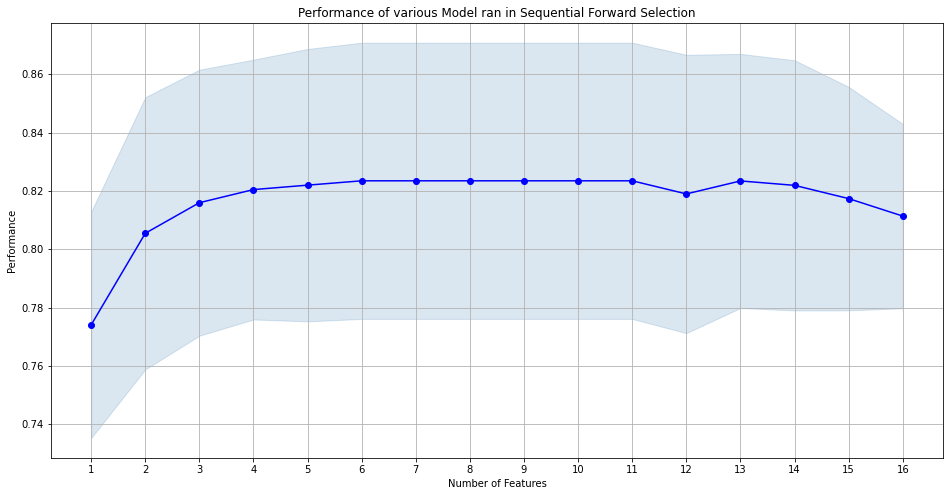

In [1567]:
plt.rcParams['figure.figsize'] = (16,8)

fig1 = plot_sfs(sfs2.get_metric_dict())
plt.title('Performance of various Model ran in Sequential Forward Selection')
plt.grid()
plt.show()

In [1568]:
# Creating Dataframe representing performance of Features in SFS 

sfs2_df = pd.DataFrame(sfs2.get_metric_dict()).T.reset_index()

display(sfs2_df)

,index,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,1,"(7,)","[0.7014925373134329, 0.7910447761194029, 0.835...",0.774039,"(Name_Title_Mr,)",0.0288114,0.0387921,0.0129307
1,2,"(7, 13)","[0.7313432835820896, 0.8656716417910447, 0.850...",0.80545,"(Name_Title_Mr, Relatives_5)",0.0346583,0.0466645,0.0155548
2,3,"(7, 9, 13)","[0.746268656716418, 0.8955223880597015, 0.8358...",0.815943,"(Name_Title_Mr, Name_Title_Others, Relatives_5)",0.0338739,0.0456084,0.0152028
3,4,"(7, 9, 13, 16)","[0.7611940298507462, 0.9104477611940298, 0.835...",0.820443,"(Name_Title_Mr, Name_Title_Others, Relatives_5...",0.0330833,0.0445439,0.014848
4,5,"(0, 7, 9, 13, 16)","[0.7611940298507462, 0.9104477611940298, 0.835...",0.821958,"(Imp_Ppl, Name_Title_Mr, Name_Title_Others, Re...",0.0346905,0.0467078,0.0155693
5,6,"(0, 3, 7, 9, 13, 16)","[0.7611940298507462, 0.9104477611940298, 0.850...",0.823451,"(Imp_Ppl, Pclass_3, Name_Title_Mr, Name_Title_...",0.0351755,0.0473609,0.015787
6,7,"(0, 3, 4, 7, 9, 13, 16)","[0.7611940298507462, 0.9104477611940298, 0.850...",0.823451,"(Imp_Ppl, Pclass_3, Embarked_Q, Name_Title_Mr,...",0.0351755,0.0473609,0.015787
7,8,"(0, 3, 4, 7, 9, 10, 13, 16)","[0.7611940298507462, 0.9104477611940298, 0.850...",0.823451,"(Imp_Ppl, Pclass_3, Embarked_Q, Name_Title_Mr,...",0.0351755,0.0473609,0.015787
8,9,"(0, 3, 4, 7, 9, 10, 11, 13, 16)","[0.7611940298507462, 0.9104477611940298, 0.850...",0.823451,"(Imp_Ppl, Pclass_3, Embarked_Q, Name_Title_Mr,...",0.0351755,0.0473609,0.015787
9,10,"(0, 3, 4, 7, 9, 10, 11, 12, 13, 16)","[0.7611940298507462, 0.9104477611940298, 0.850...",0.823451,"(Imp_Ppl, Pclass_3, Embarked_Q, Name_Title_Mr,...",0.0351755,0.0473609,0.015787


In [1569]:
# Best score at 

sfs2_df.iloc[sfs2_df['avg_score'].astype('float').idxmax()].to_frame()

,5
index,6
feature_idx,"(0, 3, 7, 9, 13, 16)"
cv_scores,"[0.7611940298507462, 0.9104477611940298, 0.850..."
avg_score,0.823451
feature_names,"(Imp_Ppl, Pclass_3, Name_Title_Mr, Name_Title_..."
ci_bound,0.0351755
std_dev,0.0473609
std_err,0.015787


In [1570]:
sfs_features2 = list(sfs2_df.iloc[sfs2_df['avg_score'].astype('float').idxmax()][4])

In [1571]:
x = train_df1[sfs_features2]
y = train['Survived']

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=12, stratify=y)

print('X train :', x_train.shape)
print('x test :', x_test.shape)

X train : (623, 6)
x test : (268, 6)


In [1572]:
logR = LogisticRegression()

logR.fit(x_train,y_train)
y_pred = logR.predict(x_test)
y_prob = logR.predict_proba(x_test)

In [1573]:
print('Accuracy Score : ', accuracy_score(y_test, y_pred), '\n')
print('Confusion Matrix : \n', confusion_matrix(y_test,y_pred),'\n')
print('Classification Report : \n', classification_report(y_test,y_pred))

Accuracy Score :  0.8283582089552238 

Confusion Matrix : 
 [[144  21]
 [ 25  78]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       165
           1       0.79      0.76      0.77       103

    accuracy                           0.83       268
   macro avg       0.82      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268



In [1574]:
k=[]

for i in y_prob[:,0]:
    if i < 0.53:
        k.append(1)
    else:
        k.append(0)

print('Accuracy Score : ', accuracy_score(y_test, k), '\n')
print('Confusion Matrix : \n', confusion_matrix(y_test,k),'\n')
print('Classification Report : \n', classification_report(y_test,k))

Accuracy Score :  0.8283582089552238 

Confusion Matrix : 
 [[144  21]
 [ 25  78]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       165
           1       0.79      0.76      0.77       103

    accuracy                           0.83       268
   macro avg       0.82      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268



## Random Forest

In [1661]:
rf_df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Name_Title,Imp_Ppl,Relatives,Age_scaled,Fare_scaled,Fare_cat
0,1,0.0,3,0,22.0,7.2500,0,2,0,1,-0.598919,-0.669624,0
1,2,1.0,1,1,38.0,71.2833,1,3,1,1,0.613894,1.303814,2
2,3,1.0,3,1,26.0,7.9250,0,1,0,0,-0.295716,-0.648821,0


In [1576]:
rf_df['Fare_cat'] = rf_df['Fare'].apply(lambda x: '<10' if x<=10 else '10-30' if (x>10) and (x<=30) 
                                          else '30-75' if (x>30) and (x<=75) else '>75')

In [1577]:
rf_df.Fare_cat.value_counts()

<10      491
10-30    475
30-75    198
>75      145
Name: Fare_cat, dtype: int64

In [1578]:
# Fare_cat - '<10': 0, '10-30': 1, '30-75': 2, '>75':3
rf_df['Fare_cat'] = rf_df['Fare_cat'].apply(lambda x: 0 if x=='<10' else 1 if x=='10-30' else 2 if x=='30-75' else 3)
rf_df['Fare_cat'] = rf_df['Fare_cat'].astype('object')

In [1662]:
rf_df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Name_Title,Imp_Ppl,Relatives,Age_scaled,Fare_scaled,Fare_cat
0,1,0.0,3,0,22.0,7.2500,0,2,0,1,-0.598919,-0.669624,0
1,2,1.0,1,1,38.0,71.2833,1,3,1,1,0.613894,1.303814,2
2,3,1.0,3,1,26.0,7.9250,0,1,0,0,-0.295716,-0.648821,0


In [1663]:
train_df = rf_df.iloc[:891,:]

x = train_df.drop(columns=['PassengerId','Survived','Age','Fare','Fare_scaled'])
y = train['Survived']

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=112)

In [1664]:
print('X train :', x_train.shape)
print('x test :', x_test.shape)

X train : (668, 8)
x test : (223, 8)


In [1665]:
rf = RandomForestClassifier()

rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
y_prob = rf.predict_proba(x_test)

In [1666]:
print('Accuracy Score : ', accuracy_score(y_test, y_pred), '\n')
print('Confusion Matrix : \n', confusion_matrix(y_test,y_pred),'\n')
print('Classification Report : \n', classification_report(y_test,y_pred))

Accuracy Score :  0.8251121076233184 

Confusion Matrix : 
 [[118  21]
 [ 18  66]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       139
           1       0.76      0.79      0.77        84

    accuracy                           0.83       223
   macro avg       0.81      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223



In [1678]:
k=[]

for i in y_prob[:,0]:
    if i < 0.44:
        k.append(1)
    else:
        k.append(0)

print('Accuracy Score : ', accuracy_score(y_test, k), '\n')
print('Confusion Matrix : \n', confusion_matrix(y_test,k),'\n')
print('Classification Report : \n', classification_report(y_test,k))

Accuracy Score :  0.8385650224215246 

Confusion Matrix : 
 [[121  18]
 [ 18  66]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       139
           1       0.79      0.79      0.79        84

    accuracy                           0.84       223
   macro avg       0.83      0.83      0.83       223
weighted avg       0.84      0.84      0.84       223



- GridSearchCV

In [1585]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 80, stop = 320, num = 7)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 10, num = 8)]

# Maximum Features
max_features = [2,3,4,5,6]

params = {'n_estimators': n_estimators,
          'max_depth': max_depth,
          'max_features': max_features}

print(params)

{'n_estimators': [80, 120, 160, 200, 240, 280, 320], 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10], 'max_features': [2, 3, 4, 5, 6]}


In [1586]:
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=4, verbose=2)

rf_grid.fit(x_train, y_train)

Fitting 4 folds for each of 280 candidates, totalling 1120 fits
[CV] max_depth=3, max_features=2, n_estimators=80 ....................
[CV] ..... max_depth=3, max_features=2, n_estimators=80, total=   0.1s
[CV] max_depth=3, max_features=2, n_estimators=80 ....................
[CV] ..... max_depth=3, max_features=2, n_estimators=80, total=   0.1s
[CV] max_depth=3, max_features=2, n_estimators=80 ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..... max_depth=3, max_features=2, n_estimators=80, total=   0.1s
[CV] max_depth=3, max_features=2, n_estimators=80 ....................
[CV] ..... max_depth=3, max_features=2, n_estimators=80, total=   0.1s
[CV] max_depth=3, max_features=2, n_estimators=120 ...................
[CV] .... max_depth=3, max_features=2, n_estimators=120, total=   0.1s
[CV] max_depth=3, max_features=2, n_estimators=120 ...................
[CV] .... max_depth=3, max_features=2, n_estimators=120, total=   0.1s
[CV] max_depth=3, max_features=2, n_estimators=120 ...................
[CV] .... max_depth=3, max_features=2, n_estimators=120, total=   0.1s
[CV] max_depth=3, max_features=2, n_estimators=120 ...................
[CV] .... max_depth=3, max_features=2, n_estimators=120, total=   0.1s
[CV] max_depth=3, max_features=2, n_estimators=160 ...................
[CV] .... max_depth=3, max_features=2, n_estimators=160, total=   0.1s
[CV] max_depth=3, max_features=2, n_estimators=160 ...................
[CV] .

[CV] .... max_depth=3, max_features=4, n_estimators=120, total=   0.1s
[CV] max_depth=3, max_features=4, n_estimators=120 ...................
[CV] .... max_depth=3, max_features=4, n_estimators=120, total=   0.1s
[CV] max_depth=3, max_features=4, n_estimators=120 ...................
[CV] .... max_depth=3, max_features=4, n_estimators=120, total=   0.1s
[CV] max_depth=3, max_features=4, n_estimators=160 ...................
[CV] .... max_depth=3, max_features=4, n_estimators=160, total=   0.1s
[CV] max_depth=3, max_features=4, n_estimators=160 ...................
[CV] .... max_depth=3, max_features=4, n_estimators=160, total=   0.1s
[CV] max_depth=3, max_features=4, n_estimators=160 ...................
[CV] .... max_depth=3, max_features=4, n_estimators=160, total=   0.1s
[CV] max_depth=3, max_features=4, n_estimators=160 ...................
[CV] .... max_depth=3, max_features=4, n_estimators=160, total=   0.1s
[CV] max_depth=3, max_features=4, n_estimators=200 ...................
[CV] .

[CV] .... max_depth=3, max_features=6, n_estimators=120, total=   0.1s
[CV] max_depth=3, max_features=6, n_estimators=160 ...................
[CV] .... max_depth=3, max_features=6, n_estimators=160, total=   0.1s
[CV] max_depth=3, max_features=6, n_estimators=160 ...................
[CV] .... max_depth=3, max_features=6, n_estimators=160, total=   0.1s
[CV] max_depth=3, max_features=6, n_estimators=160 ...................
[CV] .... max_depth=3, max_features=6, n_estimators=160, total=   0.1s
[CV] max_depth=3, max_features=6, n_estimators=160 ...................
[CV] .... max_depth=3, max_features=6, n_estimators=160, total=   0.1s
[CV] max_depth=3, max_features=6, n_estimators=200 ...................
[CV] .... max_depth=3, max_features=6, n_estimators=200, total=   0.2s
[CV] max_depth=3, max_features=6, n_estimators=200 ...................
[CV] .... max_depth=3, max_features=6, n_estimators=200, total=   0.2s
[CV] max_depth=3, max_features=6, n_estimators=200 ...................
[CV] .

[CV] .... max_depth=4, max_features=3, n_estimators=160, total=   0.1s
[CV] max_depth=4, max_features=3, n_estimators=160 ...................
[CV] .... max_depth=4, max_features=3, n_estimators=160, total=   0.1s
[CV] max_depth=4, max_features=3, n_estimators=160 ...................
[CV] .... max_depth=4, max_features=3, n_estimators=160, total=   0.1s
[CV] max_depth=4, max_features=3, n_estimators=200 ...................
[CV] .... max_depth=4, max_features=3, n_estimators=200, total=   0.2s
[CV] max_depth=4, max_features=3, n_estimators=200 ...................
[CV] .... max_depth=4, max_features=3, n_estimators=200, total=   0.2s
[CV] max_depth=4, max_features=3, n_estimators=200 ...................
[CV] .... max_depth=4, max_features=3, n_estimators=200, total=   0.2s
[CV] max_depth=4, max_features=3, n_estimators=200 ...................
[CV] .... max_depth=4, max_features=3, n_estimators=200, total=   0.2s
[CV] max_depth=4, max_features=3, n_estimators=240 ...................
[CV] .

[CV] .... max_depth=4, max_features=5, n_estimators=160, total=   0.1s
[CV] max_depth=4, max_features=5, n_estimators=200 ...................
[CV] .... max_depth=4, max_features=5, n_estimators=200, total=   0.2s
[CV] max_depth=4, max_features=5, n_estimators=200 ...................
[CV] .... max_depth=4, max_features=5, n_estimators=200, total=   0.2s
[CV] max_depth=4, max_features=5, n_estimators=200 ...................
[CV] .... max_depth=4, max_features=5, n_estimators=200, total=   0.2s
[CV] max_depth=4, max_features=5, n_estimators=200 ...................
[CV] .... max_depth=4, max_features=5, n_estimators=200, total=   0.2s
[CV] max_depth=4, max_features=5, n_estimators=240 ...................
[CV] .... max_depth=4, max_features=5, n_estimators=240, total=   0.2s
[CV] max_depth=4, max_features=5, n_estimators=240 ...................
[CV] .... max_depth=4, max_features=5, n_estimators=240, total=   0.2s
[CV] max_depth=4, max_features=5, n_estimators=240 ...................
[CV] .

[CV] .... max_depth=5, max_features=2, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=2, n_estimators=200 ...................
[CV] .... max_depth=5, max_features=2, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=2, n_estimators=200 ...................
[CV] .... max_depth=5, max_features=2, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=2, n_estimators=240 ...................
[CV] .... max_depth=5, max_features=2, n_estimators=240, total=   0.2s
[CV] max_depth=5, max_features=2, n_estimators=240 ...................
[CV] .... max_depth=5, max_features=2, n_estimators=240, total=   0.2s
[CV] max_depth=5, max_features=2, n_estimators=240 ...................
[CV] .... max_depth=5, max_features=2, n_estimators=240, total=   0.2s
[CV] max_depth=5, max_features=2, n_estimators=240 ...................
[CV] .... max_depth=5, max_features=2, n_estimators=240, total=   0.2s
[CV] max_depth=5, max_features=2, n_estimators=280 ...................
[CV] .

[CV] .... max_depth=5, max_features=4, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=4, n_estimators=240 ...................
[CV] .... max_depth=5, max_features=4, n_estimators=240, total=   0.2s
[CV] max_depth=5, max_features=4, n_estimators=240 ...................
[CV] .... max_depth=5, max_features=4, n_estimators=240, total=   0.2s
[CV] max_depth=5, max_features=4, n_estimators=240 ...................
[CV] .... max_depth=5, max_features=4, n_estimators=240, total=   0.2s
[CV] max_depth=5, max_features=4, n_estimators=240 ...................
[CV] .... max_depth=5, max_features=4, n_estimators=240, total=   0.2s
[CV] max_depth=5, max_features=4, n_estimators=280 ...................
[CV] .... max_depth=5, max_features=4, n_estimators=280, total=   0.3s
[CV] max_depth=5, max_features=4, n_estimators=280 ...................
[CV] .... max_depth=5, max_features=4, n_estimators=280, total=   0.3s
[CV] max_depth=5, max_features=4, n_estimators=280 ...................
[CV] .

[CV] .... max_depth=5, max_features=6, n_estimators=240, total=   0.2s
[CV] max_depth=5, max_features=6, n_estimators=240 ...................
[CV] .... max_depth=5, max_features=6, n_estimators=240, total=   0.2s
[CV] max_depth=5, max_features=6, n_estimators=240 ...................
[CV] .... max_depth=5, max_features=6, n_estimators=240, total=   0.2s
[CV] max_depth=5, max_features=6, n_estimators=280 ...................
[CV] .... max_depth=5, max_features=6, n_estimators=280, total=   0.3s
[CV] max_depth=5, max_features=6, n_estimators=280 ...................
[CV] .... max_depth=5, max_features=6, n_estimators=280, total=   0.3s
[CV] max_depth=5, max_features=6, n_estimators=280 ...................
[CV] .... max_depth=5, max_features=6, n_estimators=280, total=   0.3s
[CV] max_depth=5, max_features=6, n_estimators=280 ...................
[CV] .... max_depth=5, max_features=6, n_estimators=280, total=   0.3s
[CV] max_depth=5, max_features=6, n_estimators=320 ...................
[CV] .

[CV] .... max_depth=6, max_features=3, n_estimators=240, total=   0.2s
[CV] max_depth=6, max_features=3, n_estimators=280 ...................
[CV] .... max_depth=6, max_features=3, n_estimators=280, total=   0.3s
[CV] max_depth=6, max_features=3, n_estimators=280 ...................
[CV] .... max_depth=6, max_features=3, n_estimators=280, total=   0.3s
[CV] max_depth=6, max_features=3, n_estimators=280 ...................
[CV] .... max_depth=6, max_features=3, n_estimators=280, total=   0.3s
[CV] max_depth=6, max_features=3, n_estimators=280 ...................
[CV] .... max_depth=6, max_features=3, n_estimators=280, total=   0.3s
[CV] max_depth=6, max_features=3, n_estimators=320 ...................
[CV] .... max_depth=6, max_features=3, n_estimators=320, total=   0.3s
[CV] max_depth=6, max_features=3, n_estimators=320 ...................
[CV] .... max_depth=6, max_features=3, n_estimators=320, total=   0.3s
[CV] max_depth=6, max_features=3, n_estimators=320 ...................
[CV] .

[CV] .... max_depth=6, max_features=5, n_estimators=280, total=   0.3s
[CV] max_depth=6, max_features=5, n_estimators=280 ...................
[CV] .... max_depth=6, max_features=5, n_estimators=280, total=   0.3s
[CV] max_depth=6, max_features=5, n_estimators=280 ...................
[CV] .... max_depth=6, max_features=5, n_estimators=280, total=   0.3s
[CV] max_depth=6, max_features=5, n_estimators=320 ...................
[CV] .... max_depth=6, max_features=5, n_estimators=320, total=   0.3s
[CV] max_depth=6, max_features=5, n_estimators=320 ...................
[CV] .... max_depth=6, max_features=5, n_estimators=320, total=   0.3s
[CV] max_depth=6, max_features=5, n_estimators=320 ...................
[CV] .... max_depth=6, max_features=5, n_estimators=320, total=   0.3s
[CV] max_depth=6, max_features=5, n_estimators=320 ...................
[CV] .... max_depth=6, max_features=5, n_estimators=320, total=   0.3s
[CV] max_depth=6, max_features=6, n_estimators=80 ....................
[CV] .

[CV] .... max_depth=7, max_features=2, n_estimators=280, total=   0.3s
[CV] max_depth=7, max_features=2, n_estimators=320 ...................
[CV] .... max_depth=7, max_features=2, n_estimators=320, total=   0.3s
[CV] max_depth=7, max_features=2, n_estimators=320 ...................
[CV] .... max_depth=7, max_features=2, n_estimators=320, total=   0.3s
[CV] max_depth=7, max_features=2, n_estimators=320 ...................
[CV] .... max_depth=7, max_features=2, n_estimators=320, total=   0.3s
[CV] max_depth=7, max_features=2, n_estimators=320 ...................
[CV] .... max_depth=7, max_features=2, n_estimators=320, total=   0.3s
[CV] max_depth=7, max_features=3, n_estimators=80 ....................
[CV] ..... max_depth=7, max_features=3, n_estimators=80, total=   0.1s
[CV] max_depth=7, max_features=3, n_estimators=80 ....................
[CV] ..... max_depth=7, max_features=3, n_estimators=80, total=   0.1s
[CV] max_depth=7, max_features=3, n_estimators=80 ....................
[CV] .

[CV] .... max_depth=7, max_features=4, n_estimators=320, total=   0.3s
[CV] max_depth=7, max_features=4, n_estimators=320 ...................
[CV] .... max_depth=7, max_features=4, n_estimators=320, total=   0.3s
[CV] max_depth=7, max_features=4, n_estimators=320 ...................
[CV] .... max_depth=7, max_features=4, n_estimators=320, total=   0.3s
[CV] max_depth=7, max_features=5, n_estimators=80 ....................
[CV] ..... max_depth=7, max_features=5, n_estimators=80, total=   0.1s
[CV] max_depth=7, max_features=5, n_estimators=80 ....................
[CV] ..... max_depth=7, max_features=5, n_estimators=80, total=   0.1s
[CV] max_depth=7, max_features=5, n_estimators=80 ....................
[CV] ..... max_depth=7, max_features=5, n_estimators=80, total=   0.1s
[CV] max_depth=7, max_features=5, n_estimators=80 ....................
[CV] ..... max_depth=7, max_features=5, n_estimators=80, total=   0.1s
[CV] max_depth=7, max_features=5, n_estimators=120 ...................
[CV] .

[CV] .... max_depth=7, max_features=6, n_estimators=320, total=   0.3s
[CV] max_depth=8, max_features=2, n_estimators=80 ....................
[CV] ..... max_depth=8, max_features=2, n_estimators=80, total=   0.1s
[CV] max_depth=8, max_features=2, n_estimators=80 ....................
[CV] ..... max_depth=8, max_features=2, n_estimators=80, total=   0.1s
[CV] max_depth=8, max_features=2, n_estimators=80 ....................
[CV] ..... max_depth=8, max_features=2, n_estimators=80, total=   0.1s
[CV] max_depth=8, max_features=2, n_estimators=80 ....................
[CV] ..... max_depth=8, max_features=2, n_estimators=80, total=   0.1s
[CV] max_depth=8, max_features=2, n_estimators=120 ...................
[CV] .... max_depth=8, max_features=2, n_estimators=120, total=   0.1s
[CV] max_depth=8, max_features=2, n_estimators=120 ...................
[CV] .... max_depth=8, max_features=2, n_estimators=120, total=   0.1s
[CV] max_depth=8, max_features=2, n_estimators=120 ...................
[CV] .

[CV] ..... max_depth=8, max_features=4, n_estimators=80, total=   0.1s
[CV] max_depth=8, max_features=4, n_estimators=80 ....................
[CV] ..... max_depth=8, max_features=4, n_estimators=80, total=   0.1s
[CV] max_depth=8, max_features=4, n_estimators=120 ...................
[CV] .... max_depth=8, max_features=4, n_estimators=120, total=   0.1s
[CV] max_depth=8, max_features=4, n_estimators=120 ...................
[CV] .... max_depth=8, max_features=4, n_estimators=120, total=   0.1s
[CV] max_depth=8, max_features=4, n_estimators=120 ...................
[CV] .... max_depth=8, max_features=4, n_estimators=120, total=   0.1s
[CV] max_depth=8, max_features=4, n_estimators=120 ...................
[CV] .... max_depth=8, max_features=4, n_estimators=120, total=   0.1s
[CV] max_depth=8, max_features=4, n_estimators=160 ...................
[CV] .... max_depth=8, max_features=4, n_estimators=160, total=   0.2s
[CV] max_depth=8, max_features=4, n_estimators=160 ...................
[CV] .

[CV] .... max_depth=8, max_features=6, n_estimators=120, total=   0.1s
[CV] max_depth=8, max_features=6, n_estimators=120 ...................
[CV] .... max_depth=8, max_features=6, n_estimators=120, total=   0.1s
[CV] max_depth=8, max_features=6, n_estimators=120 ...................
[CV] .... max_depth=8, max_features=6, n_estimators=120, total=   0.1s
[CV] max_depth=8, max_features=6, n_estimators=160 ...................
[CV] .... max_depth=8, max_features=6, n_estimators=160, total=   0.2s
[CV] max_depth=8, max_features=6, n_estimators=160 ...................
[CV] .... max_depth=8, max_features=6, n_estimators=160, total=   0.2s
[CV] max_depth=8, max_features=6, n_estimators=160 ...................
[CV] .... max_depth=8, max_features=6, n_estimators=160, total=   0.2s
[CV] max_depth=8, max_features=6, n_estimators=160 ...................
[CV] .... max_depth=8, max_features=6, n_estimators=160, total=   0.2s
[CV] max_depth=8, max_features=6, n_estimators=200 ...................
[CV] .

[CV] .... max_depth=9, max_features=3, n_estimators=120, total=   0.1s
[CV] max_depth=9, max_features=3, n_estimators=160 ...................
[CV] .... max_depth=9, max_features=3, n_estimators=160, total=   0.2s
[CV] max_depth=9, max_features=3, n_estimators=160 ...................
[CV] .... max_depth=9, max_features=3, n_estimators=160, total=   0.1s
[CV] max_depth=9, max_features=3, n_estimators=160 ...................
[CV] .... max_depth=9, max_features=3, n_estimators=160, total=   0.2s
[CV] max_depth=9, max_features=3, n_estimators=160 ...................
[CV] .... max_depth=9, max_features=3, n_estimators=160, total=   0.1s
[CV] max_depth=9, max_features=3, n_estimators=200 ...................
[CV] .... max_depth=9, max_features=3, n_estimators=200, total=   0.2s
[CV] max_depth=9, max_features=3, n_estimators=200 ...................
[CV] .... max_depth=9, max_features=3, n_estimators=200, total=   0.2s
[CV] max_depth=9, max_features=3, n_estimators=200 ...................
[CV] .

[CV] .... max_depth=9, max_features=5, n_estimators=160, total=   0.2s
[CV] max_depth=9, max_features=5, n_estimators=160 ...................
[CV] .... max_depth=9, max_features=5, n_estimators=160, total=   0.2s
[CV] max_depth=9, max_features=5, n_estimators=160 ...................
[CV] .... max_depth=9, max_features=5, n_estimators=160, total=   0.2s
[CV] max_depth=9, max_features=5, n_estimators=200 ...................
[CV] .... max_depth=9, max_features=5, n_estimators=200, total=   0.2s
[CV] max_depth=9, max_features=5, n_estimators=200 ...................
[CV] .... max_depth=9, max_features=5, n_estimators=200, total=   0.2s
[CV] max_depth=9, max_features=5, n_estimators=200 ...................
[CV] .... max_depth=9, max_features=5, n_estimators=200, total=   0.2s
[CV] max_depth=9, max_features=5, n_estimators=200 ...................
[CV] .... max_depth=9, max_features=5, n_estimators=200, total=   0.2s
[CV] max_depth=9, max_features=5, n_estimators=240 ...................
[CV] .

[CV] ... max_depth=10, max_features=2, n_estimators=160, total=   0.2s
[CV] max_depth=10, max_features=2, n_estimators=200 ..................
[CV] ... max_depth=10, max_features=2, n_estimators=200, total=   0.2s
[CV] max_depth=10, max_features=2, n_estimators=200 ..................
[CV] ... max_depth=10, max_features=2, n_estimators=200, total=   0.2s
[CV] max_depth=10, max_features=2, n_estimators=200 ..................
[CV] ... max_depth=10, max_features=2, n_estimators=200, total=   0.2s
[CV] max_depth=10, max_features=2, n_estimators=200 ..................
[CV] ... max_depth=10, max_features=2, n_estimators=200, total=   0.2s
[CV] max_depth=10, max_features=2, n_estimators=240 ..................
[CV] ... max_depth=10, max_features=2, n_estimators=240, total=   0.2s
[CV] max_depth=10, max_features=2, n_estimators=240 ..................
[CV] ... max_depth=10, max_features=2, n_estimators=240, total=   0.2s
[CV] max_depth=10, max_features=2, n_estimators=240 ..................
[CV] .

[CV] ... max_depth=10, max_features=4, n_estimators=200, total=   0.2s
[CV] max_depth=10, max_features=4, n_estimators=200 ..................
[CV] ... max_depth=10, max_features=4, n_estimators=200, total=   0.2s
[CV] max_depth=10, max_features=4, n_estimators=240 ..................
[CV] ... max_depth=10, max_features=4, n_estimators=240, total=   0.2s
[CV] max_depth=10, max_features=4, n_estimators=240 ..................
[CV] ... max_depth=10, max_features=4, n_estimators=240, total=   0.2s
[CV] max_depth=10, max_features=4, n_estimators=240 ..................
[CV] ... max_depth=10, max_features=4, n_estimators=240, total=   0.2s
[CV] max_depth=10, max_features=4, n_estimators=240 ..................
[CV] ... max_depth=10, max_features=4, n_estimators=240, total=   0.2s
[CV] max_depth=10, max_features=4, n_estimators=280 ..................
[CV] ... max_depth=10, max_features=4, n_estimators=280, total=   0.3s
[CV] max_depth=10, max_features=4, n_estimators=280 ..................
[CV] .

[CV] ... max_depth=10, max_features=6, n_estimators=240, total=   0.2s
[CV] max_depth=10, max_features=6, n_estimators=240 ..................
[CV] ... max_depth=10, max_features=6, n_estimators=240, total=   0.2s
[CV] max_depth=10, max_features=6, n_estimators=240 ..................
[CV] ... max_depth=10, max_features=6, n_estimators=240, total=   0.2s
[CV] max_depth=10, max_features=6, n_estimators=240 ..................
[CV] ... max_depth=10, max_features=6, n_estimators=240, total=   0.2s
[CV] max_depth=10, max_features=6, n_estimators=280 ..................
[CV] ... max_depth=10, max_features=6, n_estimators=280, total=   0.3s
[CV] max_depth=10, max_features=6, n_estimators=280 ..................
[CV] ... max_depth=10, max_features=6, n_estimators=280, total=   0.3s
[CV] max_depth=10, max_features=6, n_estimators=280 ..................
[CV] ... max_depth=10, max_features=6, n_estimators=280, total=   0.3s
[CV] max_depth=10, max_features=6, n_estimators=280 ..................
[CV] .

[Parallel(n_jobs=1)]: Done 1120 out of 1120 | elapsed:  3.5min finished


GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [2, 3, 4, 5, 6],
                         'n_estimators': [80, 120, 160, 200, 240, 280, 320]},
             verbose=2)

In [1587]:
rf_grid.best_params_
# best_params - max_depth= 4, max_features= 2, n_estimators= 160

{'max_depth': 4, 'max_features': 3, 'n_estimators': 320}

In [1679]:
rf = RandomForestClassifier(max_depth= 4, max_features= 3, n_estimators= 320)

rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
y_prob = rf.predict_proba(x_test)

In [1680]:
print('Accuracy Score : ', accuracy_score(y_test, y_pred), '\n')
print('Confusion Matrix : \n', confusion_matrix(y_test,y_pred),'\n')
print('Classification Report : \n', classification_report(y_test,y_pred))

Accuracy Score :  0.8699551569506726 

Confusion Matrix : 
 [[127  12]
 [ 17  67]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.91      0.90       139
           1       0.85      0.80      0.82        84

    accuracy                           0.87       223
   macro avg       0.87      0.86      0.86       223
weighted avg       0.87      0.87      0.87       223



In [1702]:
k=[]

for i in y_prob[:,0]:
    if i < 0.53:
        k.append(1)
    else:
        k.append(0)

print('Accuracy Score : ', accuracy_score(y_test, k), '\n')
print('Confusion Matrix : \n', confusion_matrix(y_test,k),'\n')
print('Classification Report : \n', classification_report(y_test,k))

Accuracy Score :  0.8699551569506726 

Confusion Matrix : 
 [[127  12]
 [ 17  67]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.91      0.90       139
           1       0.85      0.80      0.82        84

    accuracy                           0.87       223
   macro avg       0.87      0.86      0.86       223
weighted avg       0.87      0.87      0.87       223



# Test Set

## LogisticRegression

In [1601]:
test_df = dummy_df1.iloc[891:,:].copy()

In [1602]:
test_df.head(3)

,PassengerId,Survived,Age,Imp_Ppl,Age_scaled,Fare_scaled,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Name_Title_Miss,Name_Title_Mr,Name_Title_Mrs,Name_Title_Others,Relatives_1,Relatives_2,Relatives_3,Relatives_5,Fare_30-75,Fare_<10,Fare_>75
891,892,NaN,34.5,0,0.348591,-0.651774,0,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0
892,893,NaN,47.0,1,1.296101,-0.677329,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0
893,894,NaN,62.0,0,2.433113,-0.594503,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0


In [1603]:
ml_test = test_df.drop(columns=['PassengerId','Survived','Age','Sex_male','Fare_scaled'])

In [1604]:
ml_test.head(3)

,Imp_Ppl,Age_scaled,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Name_Title_Miss,Name_Title_Mr,Name_Title_Mrs,Name_Title_Others,Relatives_1,Relatives_2,Relatives_3,Relatives_5,Fare_30-75,Fare_<10,Fare_>75
891,0,0.348591,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0
892,1,1.296101,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0
893,0,2.433113,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [1605]:
ml_test.shape

(418, 17)

- Model Fitting

In [1606]:
result_logr = test_df[['PassengerId','Survived']].copy()

In [1607]:
x = dummy_df1.drop(columns=['PassengerId','Survived','Age','Sex_male','Fare_scaled']).iloc[:891,:]
y = train['Survived']

In [1608]:
logR = LogisticRegression()

logR.fit(x,y)
y_prob = logR.predict_proba(ml_test)
result_logr['Survived'] = logR.predict(ml_test)

In [1610]:
result_logr.head()

,PassengerId,Survived
891,892,0
892,893,1
893,894,0
894,895,0
895,896,1


In [1612]:
result_logr[['PassengerId','Survived']].to_csv('logr_submission1.csv', index=False)

In [1613]:
k=[]

for i in y_prob[:,0]:
    if i < 0.53:
        k.append(1)
    else:
        k.append(0)

result_logr['Survived'] = k

In [1614]:
result_logr[['PassengerId','Survived']].to_csv('logr_submission2.csv', index=False)

## RandomForest

### Fare Scaled

In [1703]:
result_rf = test_df[['PassengerId','Survived']].copy()

In [1704]:
x = rf_df.drop(columns=['PassengerId','Survived','Age','Fare','Fare_cat']).iloc[:891,:]

rf_test = rf_df.drop(columns=['PassengerId','Survived','Age','Fare','Fare_cat']).iloc[891:,:]

In [1705]:
rf = RandomForestClassifier(max_depth= 5, max_features= 2, n_estimators= 320)

rf.fit(x,y)
y_prob = rf.predict_proba(rf_test)
result_rf['Survived'] = rf.predict(rf_test)

In [1706]:
result_rf[['PassengerId','Survived']].to_csv('rf_submission1.csv',index=False)

In [1707]:
k=[]

for i in y_prob[:,0]:
    if i < 0.54:
        k.append(1)
    else:
        k.append(0)

result_rf['Survived'] = k

In [1708]:
result_rf[['PassengerId','Survived']].to_csv('rf_submission2.csv', index=False)

### Fare Categorical

In [1713]:
result_rf = test_df[['PassengerId','Survived']].copy()

In [1714]:
x = rf_df.drop(columns=['PassengerId','Survived','Age','Fare','Fare_scaled']).iloc[:891,:]

rf_test = rf_df.drop(columns=['PassengerId','Survived','Age','Fare','Fare_scaled']).iloc[891:,:]

In [1715]:
rf = RandomForestClassifier(max_depth= 4, max_features= 3, n_estimators= 320)

rf.fit(x,y)
y_prob = rf.predict_proba(rf_test)
result_rf['Survived'] = rf.predict(rf_test)

In [1716]:
result_rf[['PassengerId','Survived']].to_csv('rf_submission3.csv',index=False)

In [1717]:
k=[]

for i in y_prob[:,0]:
    if i < 0.54:
        k.append(1)
    else:
        k.append(0)

result_rf['Survived'] = k

In [1718]:
result_rf[['PassengerId','Survived']].to_csv('rf_submission4.csv', index=False)

- Using Fare as Categorical Features predicted better results and increased kaggle rank to 2460